# Python Notebook to automatically generate Belt crop images and their corresponding rescaled labels.txt file and store in [yolov5 ultralytics] (https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data) format for training

In [35]:
import cv2
cv2.__version__

from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np

# %matplotlib qt

import glob
import shutil
# import numpy as np
import os


In [36]:
txt_file_list=glob.glob("/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/*.txt")
image_list=glob.glob("/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/*.jpg")

In [37]:
txt_file_list.sort()
txt_file_list

['/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112136093_1_targetRGBright_3c.txt',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112140895_1_targetRGBright_3c.txt',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112143855_1_confirmRGBRight_3c.txt',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112147092_1_targetRGBright_3c.txt',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112344866_1_confirmRGBRight_3c.txt',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112347598_1_targetRGBright_3c.txt',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112523932_1_confirmRGBRight_3c.txt',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112524343_1_confirmRGBRight_3c.txt',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112527387_1_targetRGBright_3c.txt',
 '/hom

In [38]:
image_list.sort()
image_list

['/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112136093_1_targetRGBright_3c.jpg',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112140895_1_targetRGBright_3c.jpg',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112143855_1_confirmRGBRight_3c.jpg',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112147092_1_targetRGBright_3c.jpg',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112344866_1_confirmRGBRight_3c.jpg',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112347598_1_targetRGBright_3c.jpg',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112523932_1_confirmRGBRight_3c.jpg',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112524343_1_confirmRGBRight_3c.jpg',
 '/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112527387_1_targetRGBright_3c.jpg',
 '/hom

In [39]:
# apbs_target_signature= [268, 5, 17, 15]
# apbs_confirm_signature= [320, 11, 14, 12]
pivr_confirm_signature= [184, 3, 16, 14]
pivr_target_signature= [85, 30, 12, 12]

apbs_target_signature=[425, 0, 30, 30] 

apbs_confirm_signature= [40, 50, 25, 25]
# apbs_sig=cv2.imread("data/apbs_target_signature.jpg")

In [40]:
pivr_tar_orig=cv2.imread("data/pivr_target_signature.jpg")
pivr_conf_orig=cv2.imread("data/pivr_confirm_signature.jpg")
apbs_tar_orig=cv2.imread("data/apbs_target_640x480_signature.jpg")
apbs_conf_orig=cv2.imread("data/apbs_confirm_640x480_signature.jpg")

In [41]:
# def mse(imageA, imageB):
#     # the 'Mean Squared Error' between the two images is the
#     # sum of the squared difference between the two images;
#     # NOTE: the two images must have the same dimension
#     err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
#     err /= float(imageA.shape[0] * imageA.shape[1])

#     # return the MSE, the lower the error, the more "similar"
#     # the two images are
#     return err

def compare_images(imageA, imageB):
    # compute the mean squared error and structural similarity
    # index for the images
#     m = mse(imageA, imageB)
    s = ssim(imageA, imageB, multichannel=True)
    
    
#     # setup the figure
#     fig = plt.figure(title)
#     plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
#     # show first image
#     ax = fig.add_subplot(1, 2, 1)
#     plt.imshow(imageA, cmap = plt.cm.gray)
#     plt.axis("off")
#     # show the second image
#     ax = fig.add_subplot(1, 2, 2)
#     plt.imshow(imageB, cmap = plt.cm.gray)
#     plt.axis("off")
#     # show the images
#     plt.show()
    
    return s

def find_image_cam_class(img):
    
    '''
     return:
     
     0 if image is Pivr Target
     1 if image is Piver Confirm
     2 if image is apbs Target
     3 if image is apbs Confirm
    '''
    
    #img=cv2.imread(image)
    
    Crop_pivr_tar  = img[int(pivr_target_signature[1]):int(pivr_target_signature[1]+pivr_target_signature[3]), int(pivr_target_signature[0]):int(pivr_target_signature[0]+pivr_target_signature[2])]
    Crop_pivr_conf = img[int(pivr_confirm_signature[1]):int(pivr_confirm_signature[1]+pivr_confirm_signature[3]), int(pivr_confirm_signature[0]):int(pivr_confirm_signature[0]+pivr_confirm_signature[2])]
    Crop_apbs_tar  = img[int(apbs_target_signature[1]):int(apbs_target_signature[1]+apbs_target_signature[3]), int(apbs_target_signature[0]):int(apbs_target_signature[0]+apbs_target_signature[2])]
    Crop_apbs_conf = img[int(apbs_confirm_signature[1]):int(apbs_confirm_signature[1]+apbs_confirm_signature[3]), int(apbs_confirm_signature[0]):int(apbs_confirm_signature[0]+apbs_confirm_signature[2])]

    my_list= [compare_images(pivr_tar_orig,Crop_pivr_tar), \
              compare_images(pivr_conf_orig,Crop_pivr_conf), \
              compare_images(apbs_tar_orig,Crop_apbs_tar), \
              compare_images(apbs_conf_orig,Crop_apbs_conf)]
#     print(my_list)
    
    return np.argmax(my_list)

In [42]:
def get_cropped_image(img_path):
# img=cv2.imread("/home/rndvision/Desktop/ir_pivr_target/20210901000831053_1_targetraw_1c.jpg")
# img=cv2.imread("/home/rndvision/Desktop/ir_pivr_confirm/20210901000904086_1_confirmraw_1c.jpg")

# img=cv2.imread("/home/rndvision/Desktop/empty_IR_apbs/apbs_confirm_empty/20210917164416470_1_confirmraw_1c.png")
# img=cv2.imread("/home/rndvision/Desktop/empty_IR_apbs/apbs_target_empty/20210917095419910_1_targetraw_1c.png")

    img= cv2.imread(img_path)
    
    # TODO: include condition for 
    
    img_shape= img.shape 
        # (162, 165, 3)
        # (178, 199, 3)
        # (154, 226, 3)
        # (180, 200, 3)
    
    if (img_shape[0]==162 and img_shape[1]==165):
        return img
    
    if (img_shape[0]==178 and img_shape[1]==199):
        return img
    
    if (img_shape[0]==154 and img_shape[1]==226):
        return img
    
    if (img_shape[0]==180 and img_shape[1]==200):
        return img
    
    

    ind= find_image_cam_class(img)
    print("index: ", ind)

    if ind==0:
        # image is Pivr Target
        x = 158
        y = 79
        w = 165
        h = 162

    elif ind==1:
        # image is Pivr confirm
        x = 2
        y = 94
        w = 226
        h = 154

    elif ind==2:
        # image is apbs Target
#         int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])
        # belt:  (179, 158, 277, 227) 640x480 img
        x= 179
        y= 158
        w= 277
        h= 230
        
        
        #  352x287 size image
#         x = 80
#         y = 100
#         w = 200
#         h = 180

    elif ind==3:
        # image is apbs confirm
        # belt: (255, 55, 278, 260) 640x480 img
        
        # 640x480 size img
        x= 255
        y= 55
        w= 278
        h= 260
        
#         #  352x287 size image
#         x = 130
#         y = 8
#         w = 199
#         h = 178

    crop_img = img[y:y+h, x:x+w]
    
#     cv2.rectangle(img, ( int(0.5027360000000001*h),int(0.383687*w)), (int((0.5027360000000001+0.210894)*h), int((0.383687+0.197294)*w) ), (255, 0, 0), 2)

#     fig = plt.figure("Original vs cropped")
#     # plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
# #     show first image
# #     ax = fig.add_subplot(1, 2, 1)
# #     plt.imshow(img)
# #     plt.axis("off")
# #     # show the second imagehttp://localhost:8890/notebooks/belt_crop.ipynb#
# #     ax = fig.add_subplot(1, 2, 2)
#     plt.imshow(crop_img)
#     plt.axis("off")
#     # show the images
#     plt.show()
    
    return crop_img ,x,y,w,h

In [87]:
def update_label_row(r,b,l,X_crop,y_crop,w,h):
    
    '''
        Use when label.txt files are in yolv5 normalized format i.e. (class_id,x_c,y_c,w,h)
        b : Breadth of the image, 640
        l : Height or lenght of the image, 480
    
    '''
    
    # new_r= np.array([1, ((640*r[1])-X_crop)/w, ((480*r[2])-y_crop)/h, ((r[3]*640)/w), ((r[4]*480)/h) ])
    
    if (((b*r[1])-X_crop)/w > 1) or (((l*r[2])-y_crop)/h > 1):
        return None
    
    new_r= np.array([r[0], ((b*r[1])-X_crop)/w, ((l*r[2])-y_crop)/h, ((r[3]*b)/w), ((r[4]*l)/h) ])
    
    return new_r

# save to new yolov5 train format folder

In [68]:
file_name_offset=61
emp=0
full=0
total=0
one_box=0
more_bbox=0

# Label text and Cropped images updating and storage code

In [69]:
total=0
for txt_files, img_file in zip(txt_file_list,image_list):
    
    total = total +1
    
    print("TOTAL: ", total)
    numpy_f= np.loadtxt(txt_files)
    print("txt file: ", txt_files)
    print("img file: ", img_file)
    
    
    
        # Move the images
    img,X_crop,y_crop,w,h=get_cropped_image(img_file)
    
    if(total/24315 <=0.20):
        # move image to test
        cv2.imwrite("/home/rndvision/Data/yolov5_playment_data/images/test/"+img_file[64::],img)

    elif(total/24315 >0.20):
        #move image to train
        cv2.imwrite("/home/rndvision/Data/yolov5_playment_data/images/train/"+img_file[64::],img)

    # now the txt files
    
    if os.path.getsize(txt_files) != 0:
    #         print("not empty")
    #         print("shape: ", numpy_f.shape)
        full=full+1
        numpy_dump=[]
        
        if(len(numpy_f.shape)==2):
            more_bbox=more_bbox+1  
            size_n= numpy_f.shape
            
            for i in range(size_n[0]):       
                new_row=update_label_row(numpy_f[i],640,480,X_crop, y_crop, w, h)
                
                if(new_row is not None):
                    numpy_dump.append(new_row)
                else:
                    continue                                 
    #                 print("NUMPY_F:  ", numpy_f)        
#             np.savetxt("output/train/"+txt_files[file_name_offset::],numpy_f)
            
        elif(len(numpy_f.shape)==1):
            one_box = one_box+1
            new_row=update_label_row(numpy_f,640,480,X_crop, y_crop, w, h)
            
            if(new_row is not None):
                numpy_dump.append(new_row)
            else:
                if(total/24315 <=0.20):
                    shutil.copy("text.txt","/home/rndvision/Data/yolov5_playment_data/labels/test/"+txt_files[64::])
                elif(total/24315 >0.20):
                    shutil.copy("text.txt","/home/rndvision/Data/yolov5_playment_data/labels/train/"+txt_files[64::])
                continue
        
        if(total/24315 <=0.20):
            np.savetxt("/home/rndvision/Data/yolov5_playment_data/labels/test/"+txt_files[64::],np.asarray(numpy_dump))
        elif(total/24315 >0.20):
            np.savetxt("/home/rndvision/Data/yolov5_playment_data/labels/train/"+txt_files[64::],np.asarray(numpy_dump))

                
#             if(numpy_f[0]==3):
#                 numpy_f[0]=0
#                 numpy_f= np.array([numpy_f])
#     #                 np.savetxt("output/train/"+txt_files[file_name_offset::],numpy_f)
#             else:
#                 numpy_f= np.array([numpy_f])
#     #                 np.savetxt("output/train/"+txt_files[file_name_offset::],numpy_f)
    else:
        emp=emp+1
        print("empty")
        
        if(total/24315 <=0.20):
            shutil.copy("text.txt","/home/rndvision/Data/yolov5_playment_data/labels/test/"+txt_files[64::])
        elif(total/24315 >0.20):
            shutil.copy("text.txt","/home/rndvision/Data/yolov5_playment_data/labels/train/"+txt_files[64::])
        
#         np.savetxt("output/test/"+txt_files[file_name_offset:file_name_offset+17]+".txt",numpy_f)
#         shutil.copy(my_path+txt_files[61:61+17]+txt_files[61+17:-3]+"png","/home/rndvision/Data/empty_IR_PIVR/emp_test/"+txt_files[61:61+17]+".png")


TOTAL:  1
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112136093_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112136093_1_targetRGBright_3c.jpg
index:  2
TOTAL:  2
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112140895_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112140895_1_targetRGBright_3c.jpg
index:  2
TOTAL:  3
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112143855_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112143855_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  4
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112147092_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112147092_1_targetRGBright

TOTAL:  42
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726122954609_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726122954609_1_targetRGBright_3c.jpg
index:  2
TOTAL:  43
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726122957710_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726122957710_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  44
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726123007545_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726123007545_1_targetRGBright_3c.jpg
index:  2
TOTAL:  45
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726123008241_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726123008241_1_targetRGBr

index:  2
TOTAL:  84
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726142212048_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726142212048_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  85
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726142215884_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726142215884_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  86
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726142219545_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726142219545_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  87
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726142222027_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072614222202

TOTAL:  127
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143121976_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143121976_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  128
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143125294_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143125294_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  129
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143131288_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143131288_1_targetRGBright_3c.jpg
index:  2
TOTAL:  130
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143132621_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143132621_1_con

index:  2
TOTAL:  171
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143617101_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143617101_1_targetRGBright_3c.jpg
index:  2
TOTAL:  172
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143617315_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143617315_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  173
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143620956_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143620956_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  174
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143644279_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143644

index:  2
TOTAL:  215
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143757552_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143757552_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  216
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143759705_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143759705_1_targetRGBright_3c.jpg
index:  2
TOTAL:  217
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143801322_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143801322_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  218
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143803191_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726143803

index:  2
TOTAL:  258
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726144909726_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726144909726_1_targetRGBright_3c.jpg
index:  2
TOTAL:  259
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726144911061_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726144911061_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  260
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726144913301_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726144913301_1_targetRGBright_3c.jpg
index:  2
TOTAL:  261
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726144914395_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202107261449143

index:  3
TOTAL:  302
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145312179_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145312179_1_targetRGBright_3c.jpg
index:  2
TOTAL:  303
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145313422_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145313422_1_targetRGBright_3c.jpg
index:  2
TOTAL:  304
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145313653_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145313653_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  305
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145317366_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202107261453173

index:  2
TOTAL:  346
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145904584_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145904584_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  347
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145907180_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145907180_1_targetRGBright_3c.jpg
index:  2
TOTAL:  348
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145908259_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145908259_1_targetRGBright_3c.jpg
index:  2
TOTAL:  349
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726145908468_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202107261459084

TOTAL:  390
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726150900160_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726150900160_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  391
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726150903623_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726150903623_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  392
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726150906150_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726150906150_1_targetRGBright_3c.jpg
index:  2
TOTAL:  393
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726150907225_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726150907225_1_targ

index:  2
TOTAL:  434
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151527726_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151527726_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  435
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151529833_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151529833_1_targetRGBright_3c.jpg
index:  2
TOTAL:  436
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151531482_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151531482_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  437
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151533209_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151533

index:  3
TOTAL:  478
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151846492_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151846492_1_targetRGBright_3c.jpg
index:  2
TOTAL:  479
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151847580_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151847580_1_targetRGBright_3c.jpg
index:  2
TOTAL:  480
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151847817_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151847817_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  481
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726151849893_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072615184989

TOTAL:  521
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152048911_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152048911_1_targetRGBright_3c.jpg
index:  2
TOTAL:  522
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152049361_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152049361_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  523
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152051414_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152051414_1_targetRGBright_3c.jpg
index:  2
TOTAL:  524
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152052484_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152052484_1_target

index:  3
TOTAL:  564
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152814324_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152814324_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  565
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152815566_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152815566_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  566
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152818134_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152818134_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  567
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152828025_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726152

index:  1
TOTAL:  607
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726154922923_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726154922923_1_targetRGBright_3c.jpg
index:  2
TOTAL:  608
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155233177_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155233177_1_targetRGBright_3c.jpg
index:  2
TOTAL:  609
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155235318_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155235318_1_targetRGBright_3c.jpg
index:  2
TOTAL:  610
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155236901_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155236901

TOTAL:  651
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155443941_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155443941_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  652
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155447448_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155447448_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  653
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155453275_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155453275_1_targetRGBright_3c.jpg
index:  2
TOTAL:  654
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155454427_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155454427_1_targ

TOTAL:  695
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155635464_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155635464_1_targetRGBright_3c.jpg
index:  2
TOTAL:  696
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155637729_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155637729_1_targetRGBright_3c.jpg
index:  2
TOTAL:  697
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155639378_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155639378_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  698
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155641736_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155641736_1_target

index:  2
TOTAL:  740
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155846752_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155846752_1_targetRGBright_3c.jpg
index:  2
TOTAL:  741
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155849016_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155849016_1_targetRGBright_3c.jpg
index:  2
TOTAL:  742
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155850143_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155850143_1_targetRGBright_3c.jpg
index:  2
TOTAL:  743
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155850439_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726155850439

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161529305_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161529305_1_targetRGBright_3c.jpg
index:  2
TOTAL:  784
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161529553_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161529553_1_targetRGBright_3c.jpg
index:  2
TOTAL:  785
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161530243_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161530243_1_targetRGBright_3c.jpg
index:  2
TOTAL:  786
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161532394_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161532394_1_targetRGBright_3c.jp

TOTAL:  827
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161545282_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161545282_1_targetRGBright_3c.jpg
index:  2
TOTAL:  828
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161545544_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161545544_1_targetRGBright_3c.jpg
index:  2
TOTAL:  829
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161545795_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161545795_1_targetRGBright_3c.jpg
index:  2
TOTAL:  830
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161546281_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161546281_1_targetRG

index:  1
TOTAL:  871
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161725902_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161725902_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  872
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161729599_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161729599_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  873
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161731853_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161731853_1_targetRGBright_3c.jpg
index:  2
TOTAL:  874
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161733506_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072616173

index:  2
TOTAL:  915
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161856656_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161856656_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  916
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161858925_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161858925_1_targetRGBright_3c.jpg
index:  2
TOTAL:  917
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161900314_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161900314_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  918
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161902279_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726161902

index:  2
TOTAL:  959
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162040655_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162040655_1_targetRGBright_3c.jpg
index:  2
TOTAL:  960
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162103954_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162103954_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  961
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162105908_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162105908_1_targetRGBright_3c.jpg
index:  2
TOTAL:  962
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162107634_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202107261621076

index:  2
TOTAL:  1003
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162247355_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162247355_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1004
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162249227_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162249227_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1005
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162251576_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162251576_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1006
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162253549_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072616

index:  2
TOTAL:  1047
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162418690_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162418690_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1048
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162419103_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162419103_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1049
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162420930_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162420930_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1050
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162422635_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162

index:  2
TOTAL:  1091
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162629219_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162629219_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1092
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162632869_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162632869_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1093
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162634320_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162634320_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1094
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162636212_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072616

index:  2
TOTAL:  1134
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162829922_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162829922_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1135
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162832200_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162832200_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1136
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162833699_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162833699_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1137
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726162836022_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072616

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163014440_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1178
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163015142_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163015142_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1179
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163017508_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163017508_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1180
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163018765_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163018765_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1181
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072616301

index:  3
TOTAL:  1221
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163133521_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163133521_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1222
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163135198_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163135198_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1223
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163137071_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163137071_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1224
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163138926_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163

TOTAL:  1264
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163321068_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163321068_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1265
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163322228_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163322228_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1266
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163322601_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163322601_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1267
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163325230_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163325230_1_ta

TOTAL:  1307
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163446560_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163446560_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1308
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163451116_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163451116_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1309
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163453499_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163453499_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1310
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163454911_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163454911_1

index:  2
TOTAL:  1349
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163644988_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163644988_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1350
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163648658_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163648658_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1351
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163654377_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163654377_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1352
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726163656744_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202107261636

index:  2
TOTAL:  1391
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164052047_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164052047_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1392
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164056143_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164056143_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1393
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164106206_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164106206_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1394
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164109855_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164109

index:  3
TOTAL:  1433
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164516819_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164516819_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1434
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164539548_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164539548_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1435
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164543105_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164543105_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1436
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726164544782_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072616454

index:  2
TOTAL:  1476
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726165020831_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726165020831_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1477
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726165044765_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726165044765_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1478
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726165047911_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726165047911_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1479
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726165050033_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202107261650

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727105737361_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727105737361_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1520
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727105737593_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727105737593_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1521
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727111556146_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727111556146_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1522
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727111556381_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727111556381_1_targetRGBright_3c

index:  2
TOTAL:  1562
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142524309_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142524309_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1563
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142526219_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142526219_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1564
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142528060_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142528060_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1565
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142529706_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142

index:  2
TOTAL:  1605
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142804178_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142804178_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1606
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142806073_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142806073_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1607
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142807682_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142807682_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1608
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727142809595_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072714

index:  2
TOTAL:  1646
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143115839_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143115839_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1647
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143118798_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143118798_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1648
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143125868_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143125868_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1649
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143128199_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021072714

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143321122_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143321122_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1686
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143322792_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143322792_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1687
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143324652_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143324652_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1688
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143335305_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727143335305_1_targetRGBright_

index:  2
TOTAL:  1717
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727152610614_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727152610614_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1718
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727153112944_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727153112944_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1719
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727153121449_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727153121449_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1720
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727153125439_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727153

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727164216308_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727164216308_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1760
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727164219583_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727164219583_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1761
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727164221067_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727164221067_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1762
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727164224551_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727164224551_1_confirmRGBRigh

index:  3
TOTAL:  1802
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727165348399_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727165348399_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1803
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727165356006_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727165356006_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1804
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727165357649_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727165357649_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1805
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727165400513_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202107271654

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727171022427_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727171022427_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  1841
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727171025756_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727171025756_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1842
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727171028478_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727171028478_1_targetRGBright_3c.jpg
index:  2
TOTAL:  1843
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727171042809_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210727171042809_1_confirmRGBRigh

TOTAL:  1882
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000009987_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000009987_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  1883
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000010393_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000010393_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  1884
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000014355_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000014355_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  1885
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000015671_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

index:  1
TOTAL:  1928
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000059926_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000059926_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  1929
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000100129_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000100129_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  1930
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000100346_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000100346_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  1931
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000101550_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  1974
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000230170_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000230170_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  1975
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000233601_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000233601_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  1976
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000234279_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000234279_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  1977
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000235567_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

TOTAL:  2014
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000318226_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000318226_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2015
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000318436_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000318436_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2016
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000318653_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000318653_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2017
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000318870_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

TOTAL:  2058
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000443193_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000443193_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2059
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000443409_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000443409_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2060
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000443633_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000443633_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2061
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801000449674_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

TOTAL:  2104
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001030445_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001030445_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2105
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001032398_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001032398_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2106
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001034204_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001034204_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2107
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001034414_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

TOTAL:  2150
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001309535_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001309535_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2151
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001309745_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001309745_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2152
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001309955_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001309955_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2153
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001311754_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001347307_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001347307_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2195
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001349547_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001349547_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2196
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001351704_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001351704_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2197
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001353244_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021080100135324

index:  1
TOTAL:  2238
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001557389_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001557389_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2239
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001557774_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001557774_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2240
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001558213_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001558213_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2241
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001603423_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2283
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001638668_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001638668_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2284
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001639950_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001639950_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2285
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001640160_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001640160_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2286
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001640370_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001716406_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001716406_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2327
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001717638_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001717638_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2328
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001717842_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001717842_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2329
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001718045_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021080100171804

index:  1
TOTAL:  2372
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001810356_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001810356_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2373
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001810559_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001810559_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2374
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001810807_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001810807_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2375
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801001814780_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2416
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002703690_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002703690_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2417
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002705041_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002705041_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2418
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002705244_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002705244_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2419
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002705447_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2450
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002751683_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002751683_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2451
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002753937_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002753937_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2452
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002754140_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002754140_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2453
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002754350_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2493
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002844443_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002844443_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2494
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002848019_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002848019_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2495
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002848222_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002848222_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2496
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801002848425_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2537
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003342246_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003342246_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2538
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003343429_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003343429_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2539
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003343639_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003343639_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2540
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003343849_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2584
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003500884_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003500884_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2585
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003501094_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003501094_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2586
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003502383_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003502383_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2587
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801003502600_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2628
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004140448_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004140448_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2629
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004140638_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004140638_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2630
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004142065_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004142065_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2631
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004144767_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2667
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004252549_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004252549_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2668
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004253704_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004253704_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2669
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004253907_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004253907_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2670
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004256063_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2713
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004358979_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004358979_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2714
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004400176_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004400176_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2715
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004402270_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004402270_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2716
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004402493_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

TOTAL:  2759
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004507083_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004507083_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2760
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004507322_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004507322_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2761
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004507531_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004507531_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2762
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004507734_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

TOTAL:  2806
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004550609_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004550609_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2807
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004550881_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004550881_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2808
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004551086_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004551086_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2809
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004552338_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

TOTAL:  2846
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004636284_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004636284_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2847
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004636487_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004636487_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2848
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004638769_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004638769_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2849
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004641864_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

index:  1
TOTAL:  2891
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004734497_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004734497_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2892
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004738256_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004738256_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2893
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004738445_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004738445_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2894
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004738655_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2937
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004827662_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004827662_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2938
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004827872_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004827872_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2939
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004828075_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004828075_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2940
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004828278_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  2983
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004927296_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004927296_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2984
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004928437_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004928437_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2985
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004928633_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004928633_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  2986
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801004928836_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172115018_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172115018_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3029
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172117853_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172117853_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3030
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172118063_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172118063_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3031
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172118266_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021080117211826

index:  1
TOTAL:  3074
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172150816_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172150816_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3075
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172151026_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172151026_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3076
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172152258_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172152258_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3077
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172152468_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3120
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172249911_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172249911_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3121
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172250120_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172250120_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3122
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172250338_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172250338_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3123
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801172250555_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3166
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174201034_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174201034_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3167
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174202238_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174202238_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3168
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174204149_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174204149_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3169
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174206557_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3213
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174240556_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174240556_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3214
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174241788_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174241788_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3215
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174243574_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174243574_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3216
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174243783_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3260
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174322220_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174322220_1_TargetColorImages_3c.jpg
index:  0
TOTAL:  3261
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174322431_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174322431_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3262
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174322640_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174322640_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3263
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174322858_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

TOTAL:  3305
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174358376_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174358376_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3306
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174358685_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174358685_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3307
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174358887_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174358887_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3308
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174400567_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

index:  1
TOTAL:  3351
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174453208_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174453208_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3352
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174453431_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174453431_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3353
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174453683_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174453683_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3354
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174455546_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3398
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174606554_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174606554_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3399
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174606763_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174606763_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3400
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174608822_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174608822_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3401
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174610320_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3444
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174654469_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174654469_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3445
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174655694_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174655694_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3446
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174658284_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174658284_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3447
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174658495_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3490
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174745513_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174745513_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3491
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174746920_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174746920_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3492
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174748614_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174748614_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3493
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174750350_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

TOTAL:  3536
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174826842_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174826842_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3537
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174827044_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174827044_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3538
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174828480_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174828480_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3539
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174830664_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

index:  1
TOTAL:  3582
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174922513_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174922513_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3583
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174922723_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174922723_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3584
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174922940_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174922940_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3585
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801174923157_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3628
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175004282_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175004282_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3629
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175006109_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175006109_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3630
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175008181_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175008181_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3631
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175008391_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3674
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175051610_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175051610_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3675
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175051812_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175051812_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3676
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175053031_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175053031_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3677
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175054739_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3719
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175146707_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175146707_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3720
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175146925_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175146925_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3721
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175147121_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175147121_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3722
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175147323_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3765
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175232438_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175232438_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3766
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175232620_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175232620_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3767
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175232802_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175232802_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3768
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175233019_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3811
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175307294_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175307294_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3812
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175307495_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175307495_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3813
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175307698_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175307698_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3814
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175309378_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3857
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175351743_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175351743_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3858
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175353317_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175353317_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3859
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175353534_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175353534_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3860
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175353758_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  3904
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175445278_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175445278_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3905
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175445488_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175445488_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3906
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175447588_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175447588_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3907
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175449422_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

TOTAL:  3950
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175529518_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175529518_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3951
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175529708_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175529708_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3952
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175529911_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175529911_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3953
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175531843_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

index:  1
TOTAL:  3996
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175609608_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175609608_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3997
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175609818_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175609818_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3998
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175611029_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175611029_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  3999
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175612695_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4041
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175700016_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175700016_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4042
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175700225_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175700225_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4043
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175700435_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175700435_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4044
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801175700652_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4086
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182101200_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182101200_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4087
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182101410_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182101410_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4088
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182101620_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182101620_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4089
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182102922_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182152440_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182152440_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4132
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182153910_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182153910_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4133
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182156248_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182156248_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4134
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182156437_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021080118215643

TOTAL:  4177
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182235547_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182235547_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4178
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182235757_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182235757_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4179
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182235967_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182235967_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4180
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182237647_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

TOTAL:  4222
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182323994_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182323994_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4223
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182325576_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182325576_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4224
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182325786_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182325786_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4225
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182325996_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

index:  1
TOTAL:  4267
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182405980_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182405980_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4268
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182406183_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182406183_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4269
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182407716_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182407716_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4270
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182409942_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

TOTAL:  4311
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182440799_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182440799_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4312
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182442416_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182442416_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4313
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182444152_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182444152_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4314
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182445888_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

TOTAL:  4356
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182532186_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182532186_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4357
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182532389_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182532389_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4358
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182533705_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182533705_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4359
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182535505_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

index:  1
TOTAL:  4402
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182622678_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182622678_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4403
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182624225_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182624225_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4404
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182626506_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182626506_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4405
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182628845_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4448
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182715402_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182715402_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4449
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182717138_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182717138_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4450
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182719701_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182719701_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4451
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801182719889_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4495
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210708749_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210708749_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4496
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210708952_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210708952_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4497
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210709162_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210709162_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4498
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210711297_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4542
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210750049_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210750049_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4543
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210750252_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210750252_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4544
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210750462_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210750462_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4545
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210751953_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

TOTAL:  4588
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210836474_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210836474_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4589
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210836691_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210836691_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4590
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210836894_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210836894_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4591
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210837097_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202

index:  1
TOTAL:  4634
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210931438_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210931438_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4635
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210931642_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210931642_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4636
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210932930_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210932930_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4637
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801210935471_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4680
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211021579_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211021579_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4681
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211022881_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211022881_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4682
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211023070_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211023070_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4683
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211023280_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4726
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211134774_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211134774_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4727
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211137307_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211137307_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4728
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211139413_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211139413_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4729
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211140638_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211228827_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211228827_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4773
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211230955_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211230955_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4774
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211231165_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211231165_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4775
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211231461_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021080121123146

index:  1
TOTAL:  4818
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211328972_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211328972_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4819
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211331475_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211331475_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4820
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211332702_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211332702_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4821
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211332913_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4863
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211420191_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211420191_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4864
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211422550_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211422550_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4865
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211422753_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211422753_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4866
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211422963_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4909
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211517024_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211517024_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4910
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211520217_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211520217_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4911
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211522107_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211522107_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4912
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211523338_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  4955
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211601594_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211601594_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4956
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211602805_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211602805_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4957
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211603001_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211603001_1_TargetColorImages_3c.jpg
index:  1
TOTAL:  4958
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210801211603218_1_TargetColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021

index:  1
TOTAL:  5002
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803000459596_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803000459596_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5003
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803000501515_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803000501515_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5004
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803000502312_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803000502312_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5005
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803000502515_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5048
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803015132019_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803015132019_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5049
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803015133930_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803015133930_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5050
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803015137472_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803015137472_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5051
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803015139400_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5094
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803021423798_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803021423798_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5095
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803021710154_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803021710154_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5096
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803021719416_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803021719416_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5097
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803022100617_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803024912068_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5141
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803024918382_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803024918382_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5142
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803024921246_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803024921246_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5143
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803025452816_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803025452816_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5144
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5187
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803033444274_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803033444274_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5188
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803033447193_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803033447193_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5189
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803033449097_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803033449097_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5190
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803033451323_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5234
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803035242667_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803035242667_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5235
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803035245683_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803035245683_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5236
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803035415394_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803035415394_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5237
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803035422158_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803085103871_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5281
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803085105777_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803085105777_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5282
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803085107511_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803085107511_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5283
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803085109331_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803085109331_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5284
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5327
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803091050317_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803091050317_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5328
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803091108700_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803091108700_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5329
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803091116910_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803091116910_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5330
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803091122678_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5373
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803092216736_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803092216736_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5374
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803092217023_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803092217023_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5375
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803092219522_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803092219522_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5376
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803092219732_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5420
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803094558566_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803094558566_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5421
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803094704710_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803094704710_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5422
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803094707572_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803094707572_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5423
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803094713781_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803100526504_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803100526504_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5467
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803100527288_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803100527288_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5468
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803100808541_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803100808541_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5469
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803100815388_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108031

index:  1
TOTAL:  5513
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803102323644_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803102323644_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5514
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803102331506_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803102331506_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5515
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803102349622_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803102349622_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5516
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803102351575_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803103527546_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5560
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803103609365_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803103609365_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5561
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803103648399_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803103648399_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5562
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803103708830_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803103708830_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5563
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5606
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803110121898_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803110121898_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5607
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803110123692_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803110123692_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5608
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803110125048_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803110125048_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5609
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803110127582_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

TOTAL:  5652
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803112757071_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803112757071_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5653
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803112823630_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803112823630_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5654
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803112846603_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803112846603_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5655
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803112851280_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10

TOTAL:  5698
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803130558544_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803130558544_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5699
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803130652801_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803130652801_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5700
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803130706290_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803130706290_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5701
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803130708586_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10

index:  1
TOTAL:  5745
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803132024976_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803132024976_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5746
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803132030807_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803132030807_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5747
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803132043099_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803132043099_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5748
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803132229185_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803133509653_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5792
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803133511428_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803133511428_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5793
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803133513171_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803133513171_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5794
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803133515000_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803133515000_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5795
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playme

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803141333748_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803141333748_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5838
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803141403422_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803141403422_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5839
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803141526673_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803141526673_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5840
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803141531993_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108031

index:  1
TOTAL:  5883
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803144806165_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803144806165_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5884
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803144808061_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803144808061_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5885
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803144810329_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803144810329_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5886
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803144812689_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5929
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803150411123_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803150411123_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5930
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803150432158_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803150432158_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5931
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803150534535_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803150534535_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5932
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803150624089_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  5975
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803152555010_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803152555010_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5976
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803152555605_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803152555605_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5977
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803152558755_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803152558755_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  5978
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803152602388_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6021
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803154112662_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803154112662_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6022
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803154123666_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803154123666_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6023
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803154128370_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803154128370_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6024
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803154131947_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6067
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171017791_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171017791_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6068
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171021241_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171021241_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6069
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171024671_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171024671_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6070
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171026708_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6113
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171612407_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171612407_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6114
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171612609_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171612609_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6115
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171612805_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171612805_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6116
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803171613078_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6159
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803172750086_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803172750086_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6160
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803172839114_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803172839114_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6161
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803172910917_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803172910917_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6162
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803172913260_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6205
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803174039670_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803174039670_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6206
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803174129239_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803174129239_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6207
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803174148223_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803174148223_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6208
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803174228201_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6251
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803180430064_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803180430064_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6252
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803180754081_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803180754081_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6253
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803180811846_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803180811846_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6254
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803180830537_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

TOTAL:  6297
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803204621294_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803204621294_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6298
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803205226693_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803205226693_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6299
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803205339546_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803205339546_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6300
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803205342346_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10

index:  1
TOTAL:  6343
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211002152_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211002152_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6344
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211056724_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211056724_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6345
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211104067_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211104067_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6346
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211109373_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6389
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211759234_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211759234_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6390
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211759465_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211759465_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6391
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211759668_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211759668_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6392
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803211806773_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6435
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803215342006_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803215342006_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6436
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803215350063_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803215350063_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6437
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803215354228_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803215354228_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6438
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803215404000_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803220122795_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803220122795_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6482
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803220125123_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803220125123_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6483
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803220126922_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803220126922_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6484
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803220128763_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108032

index:  1
TOTAL:  6528
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803221540874_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803221540874_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6529
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803221544010_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803221544010_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6530
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803221607375_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803221607375_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6531
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803221610252_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6574
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803223719139_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803223719139_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6575
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803223721015_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803223721015_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6576
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803223722849_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803223722849_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6577
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803223724683_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6620
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803225922913_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803225922913_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6621
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803225924768_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803225924768_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6622
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803225926904_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803225926904_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6623
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210803230009555_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

TOTAL:  6666
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804013611142_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804013611142_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6667
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804013724894_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804013724894_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6668
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804013729592_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804013729592_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6669
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804013734169_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10

TOTAL:  6712
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804020001344_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804020001344_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6713
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804020006390_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804020006390_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6714
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804020015308_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804020015308_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6715
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804020018318_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10

index:  1
TOTAL:  6758
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804023929459_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804023929459_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6759
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804023942333_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804023942333_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6760
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804024042779_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804024042779_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6761
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804024126992_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6804
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804030611275_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804030611275_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6805
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804030725280_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804030725280_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6806
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804030807238_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804030807238_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6807
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804031117940_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6850
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804032122318_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804032122318_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6851
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804033030891_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804033030891_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6852
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804033125057_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804033125057_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6853
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804033127473_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6896
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804035914088_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804035914088_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6897
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804035931335_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804035931335_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6898
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804040025901_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804040025901_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6899
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804040456390_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  1
TOTAL:  6942
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804092904115_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804092904115_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6943
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804092906029_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804092906029_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6944
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804092908689_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804092908689_1_ConfirmColorImages_3c.jpg
index:  1
TOTAL:  6945
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210804092909537_1_ConfirmColorImages_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playme

index:  2
TOTAL:  6988
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210809144645282_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210809144645282_1_targetRGBright_3c.jpg
index:  2
TOTAL:  6989
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210809150800624_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210809150800624_1_targetRGBright_3c.jpg
index:  2
TOTAL:  6990
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210809151404013_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210809151404013_1_targetRGBright_3c.jpg
index:  2
TOTAL:  6991
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210809151441016_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210809151441

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114639676_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7032
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114640907_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114640907_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7033
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114642877_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114642877_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7034
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114646307_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114646307_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7035
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114648

index:  2
TOTAL:  7073
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114808896_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114808896_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  7074
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114809110_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114809110_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7075
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114810571_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114810571_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7076
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114811796_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108101148

TOTAL:  7115
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114948700_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810114948700_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7116
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810115041344_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810115041344_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7117
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810115042601_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810115042601_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7118
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810115043625_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810115043625_1_targ

TOTAL:  7157
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810143917506_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810143917506_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7158
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810144009904_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810144009904_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7159
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810154706491_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810154706491_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7160
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810154859636_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810154859636_1_targ

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810162603141_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810162603141_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7200
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810162607632_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810162607632_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7201
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810162608602_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810162608602_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7202
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810162615521_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810162615521_1_targetRGBright_3c

TOTAL:  7240
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163415107_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163415107_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7241
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163416671_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163416671_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7242
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163425637_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163425637_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7243
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163429214_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163429214_1_targ

index:  2
TOTAL:  7281
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163753097_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163753097_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7282
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163753997_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163753997_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7283
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163755683_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163755683_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7284
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163758186_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810163758

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164015133_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164015133_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7323
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164016474_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164016474_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7324
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164017551_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164017551_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7325
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164018625_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164018625_1_targetRGBright_3c

index:  2
TOTAL:  7361
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164134789_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164134789_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7362
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164135879_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164135879_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7363
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164136888_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164136888_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7364
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210810164139308_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081016413

index:  2
TOTAL:  7401
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095230939_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095230939_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7402
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095232644_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095232644_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7403
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095233463_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095233463_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7404
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095257435_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095257

index:  2
TOTAL:  7441
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095537895_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095537895_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7442
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095539328_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095539328_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7443
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095540308_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095540308_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7444
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095557856_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811095557

index:  2
TOTAL:  7482
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100053170_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100053170_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7483
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100054196_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100054196_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7484
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100056264_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100056264_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7485
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100057347_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081110005

index:  2
TOTAL:  7523
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100330676_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100330676_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7524
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100333484_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100333484_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7525
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100334593_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100334593_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  7526
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100335995_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108111003

TOTAL:  7562
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100513304_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100513304_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7563
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100518170_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100518170_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7564
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100519052_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100519052_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7565
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100532921_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811100532921_1_con

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103355764_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7606
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103420316_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103420316_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7607
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103421215_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103421215_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7608
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103423335_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103423335_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7609
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103426

index:  2
TOTAL:  7649
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103715593_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103715593_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7650
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103718050_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103718050_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7651
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103720353_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103720353_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7652
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103722631_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811103722

index:  2
TOTAL:  7692
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104011935_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104011935_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  7693
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104013326_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104013326_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7694
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104019074_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104019074_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  7695
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104020326_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081110

index:  2
TOTAL:  7733
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104345605_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104345605_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  7734
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104349429_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104349429_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7735
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104351914_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104351914_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7736
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104427149_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108111044

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104539911_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104539911_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7776
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104540295_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104540295_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7777
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104541124_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104541124_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7778
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104541561_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104541561_1_targetRGBright_3c

index:  2
TOTAL:  7817
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104954287_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104954287_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7818
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104956886_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811104956886_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7819
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105000217_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105000217_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7820
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105001998_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105001

TOTAL:  7858
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105134742_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105134742_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7859
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105135561_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105135561_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7860
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105137173_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105137173_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7861
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105139473_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105139473_1_targ

index:  2
TOTAL:  7900
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105413721_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105413721_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7901
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105414747_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105414747_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7902
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105421301_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105421301_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7903
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105438793_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105438

TOTAL:  7942
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105654195_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105654195_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  7943
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105658550_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105658550_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7944
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105659263_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105659263_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7945
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105703678_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105703678_1_ta

TOTAL:  7983
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105944739_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105944739_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7984
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105947386_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105947386_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7985
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105949643_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105949643_1_targetRGBright_3c.jpg
index:  2
TOTAL:  7986
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105951940_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811105951940_1_targ

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110331573_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8026
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110336214_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110336214_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8027
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110342975_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110342975_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8028
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110354294_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110354294_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8029
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110355

index:  2
TOTAL:  8069
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110612608_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110612608_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8070
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110616116_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110616116_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  8071
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110618397_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110618397_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8072
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110621990_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108111106

index:  2
TOTAL:  8113
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110834641_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110834641_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8114
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110838350_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110838350_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8115
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110838963_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110838963_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8116
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811110839358_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081111083

index:  2
TOTAL:  8156
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111026250_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111026250_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8157
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111028865_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111028865_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8158
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111029670_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111029670_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8159
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111031862_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111031

index:  3
TOTAL:  8198
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111245021_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111245021_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8199
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111311131_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111311131_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8200
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111315236_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111315236_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8201
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111319636_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111319

index:  2
TOTAL:  8241
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111444835_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111444835_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8242
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111445747_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111445747_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8243
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111447663_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111447663_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8244
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111458106_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111458

index:  2
TOTAL:  8284
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111627507_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111627507_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  8285
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111629572_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111629572_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8286
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111641090_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111641090_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8287
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111641938_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108111116

index:  2
TOTAL:  8327
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111822205_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111822205_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8328
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111822975_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111822975_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8329
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111824692_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111824692_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8330
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111829821_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811111829

index:  3
TOTAL:  8370
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112118421_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112118421_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8371
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112119149_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112119149_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8372
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112120725_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112120725_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8373
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112121671_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081111212

index:  3
TOTAL:  8412
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112355369_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112355369_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8413
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112358092_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112358092_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8414
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112400515_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112400515_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8415
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112401540_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081111240

index:  3
TOTAL:  8455
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112609570_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112609570_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8456
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112615459_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112615459_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8457
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112616984_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112616984_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8458
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112621698_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112621

index:  3
TOTAL:  8499
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112817051_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112817051_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8500
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112817999_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112817999_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8501
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112819585_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112819585_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8502
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112824067_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811112824

index:  2
TOTAL:  8542
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811113240784_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811113240784_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8543
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811113243661_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811113243661_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  8544
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811113254209_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811113254209_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8545
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811113256417_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108111132

index:  2
TOTAL:  8585
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151700739_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151700739_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8586
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151701753_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151701753_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  8587
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151701983_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151701983_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8588
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151704185_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151917057_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151917057_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  8629
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151937895_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151937895_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8630
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151938997_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151938997_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8631
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151939972_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811151939972_1_targetRGBright_

index:  2
TOTAL:  8672
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152217061_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152217061_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8673
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152226963_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152226963_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8674
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152227587_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152227587_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8675
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152229269_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152229

TOTAL:  8715
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152404482_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152404482_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8716
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152406004_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152406004_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8717
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152408245_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152408245_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8718
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152413269_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152413269_1_targ

index:  2
TOTAL:  8759
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152657137_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152657137_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8760
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152707882_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152707882_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  8761
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152710426_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152710426_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8762
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152711896_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108111527

index:  2
TOTAL:  8803
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152942791_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152942791_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8804
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152944377_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152944377_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8805
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152954431_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152954431_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8806
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152955261_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811152955

index:  3
TOTAL:  8846
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153133937_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153133937_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8847
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153134848_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153134848_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8848
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153137752_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153137752_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8849
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153139340_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153139

index:  2
TOTAL:  8890
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153326320_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153326320_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8891
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153329758_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153329758_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8892
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153337172_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153337172_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8893
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153337813_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153337

TOTAL:  8933
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153546939_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153546939_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8934
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153555361_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153555361_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8935
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153558875_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153558875_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8936
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153600518_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153600518_1_targ

index:  3
TOTAL:  8977
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153742697_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153742697_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8978
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153754923_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153754923_1_targetRGBright_3c.jpg
index:  2
TOTAL:  8979
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153755897_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153755897_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  8980
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811153801199_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108111538

TOTAL:  9020
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154002917_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154002917_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9021
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154006964_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154006964_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9022
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154007860_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154007860_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9023
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154010654_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154010654_1_con

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154320156_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154320156_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9062
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154322687_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154322687_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9063
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154323324_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154323324_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9064
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154325144_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154325144_1_targetRGBright_3c

index:  2
TOTAL:  9102
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154451632_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154451632_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9103
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154452853_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154452853_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9104
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154454447_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154454447_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9105
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154458865_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154458

TOTAL:  9143
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154751157_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154751157_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9144
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154801106_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154801106_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9145
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154803483_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154803483_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9146
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154804371_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154804371_1_targ

index:  2
TOTAL:  9185
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154934586_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154934586_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9186
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154935403_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154935403_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9187
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154943884_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154943884_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9188
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154946535_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811154946

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155153859_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9228
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155155299_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155155299_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9229
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155157448_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155157448_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9230
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155200532_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155200532_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9231
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155213

index:  2
TOTAL:  9270
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155541656_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155541656_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9271
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155544108_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155544108_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9272
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155617768_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155617768_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9273
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155625144_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155909713_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155909713_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9312
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155909954_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155909954_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9313
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155911257_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155911257_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9314
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155911838_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811155911838_1_targetRGBright_

index:  2
TOTAL:  9351
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160043425_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160043425_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9352
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160047798_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160047798_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9353
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160051023_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160051023_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9354
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160052280_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160052

index:  2
TOTAL:  9389
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160212056_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160212056_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9390
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160213085_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160213085_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9391
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160214380_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160214380_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9392
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160215402_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160

index:  2
TOTAL:  9431
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160401508_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160401508_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9432
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160407903_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160407903_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9433
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160420360_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160420360_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9434
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160422852_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108111604

index:  2
TOTAL:  9473
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160843939_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160843939_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9474
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160846209_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160846209_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9475
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160853709_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160853709_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9476
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160854655_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811160854

TOTAL:  9515
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161057096_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161057096_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9516
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161101915_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161101915_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9517
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161107306_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161107306_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9518
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161111781_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161111781_1_targ

index:  2
TOTAL:  9556
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161259956_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161259956_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9557
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161302375_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161302375_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9558
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161315057_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161315057_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9559
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161317352_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081116

index:  2
TOTAL:  9597
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161509054_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161509054_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9598
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161511412_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161511412_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9599
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161513715_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161513715_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9600
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161516379_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161516

index:  2
TOTAL:  9640
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161722648_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161722648_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9641
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161725092_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161725092_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9642
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161726039_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161726039_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9643
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161727615_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161727

TOTAL:  9680
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161938819_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161938819_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9681
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161940369_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161940369_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9682
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161942777_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161942777_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9683
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161946230_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210811161946230_1_ta

index:  2
TOTAL:  9722
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812100936896_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812100936896_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9723
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812100939492_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812100939492_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9724
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812100940064_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812100940064_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9725
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812100940389_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081210094

index:  2
TOTAL:  9765
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101124740_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101124740_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9766
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101127083_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101127083_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9767
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101129689_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101129689_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9768
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101532251_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101532

TOTAL:  9808
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101742974_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101742974_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9809
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101745160_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101745160_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9810
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101746365_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101746365_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9811
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101747774_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101747774_1_ta

TOTAL:  9851
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101932275_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101932275_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9852
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101933520_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101933520_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9853
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101934467_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101934467_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9854
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101935619_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812101935619_1_

index:  2
TOTAL:  9895
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102127744_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102127744_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9896
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102129651_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102129651_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9897
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102136202_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102136202_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9898
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102136791_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102136

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102343918_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102343918_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9935
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102346014_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102346014_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9936
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102351497_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102351497_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9937
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102353134_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102353134_1_targetRGBright_

index:  3
TOTAL:  9977
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102519460_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102519460_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9978
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102520904_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102520904_1_targetRGBright_3c.jpg
index:  2
TOTAL:  9979
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102521991_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102521991_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  9980
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102528336_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081210

index:  2
TOTAL:  10018
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102748870_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102748870_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10019
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102751177_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102751177_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10020
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102754834_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102754834_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10021
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812102757262_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081210

index:  2
TOTAL:  10060
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103128700_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103128700_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10061
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103130994_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103130994_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10062
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103134166_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103134166_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10063
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103138338_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081210

index:  2
TOTAL:  10104
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103330349_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103330349_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10105
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103332559_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103332559_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10106
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103333429_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103333429_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10107
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103334929_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081210

index:  2
TOTAL:  10147
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103518650_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103518650_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  10148
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103519880_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103519880_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10149
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103523092_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103523092_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10150
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103525769_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081

index:  2
TOTAL:  10190
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103703321_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103703321_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10191
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103705569_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103705569_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10192
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103706440_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103706440_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10193
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812103707970_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081210

TOTAL:  10233
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104154644_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104154644_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10234
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104159912_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104159912_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10235
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104200954_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104200954_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  10236
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104204922_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104204922_

index:  2
TOTAL:  10276
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104348960_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104348960_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10277
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104357098_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104357098_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10278
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104358047_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104358047_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10279
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104359693_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081210

TOTAL:  10319
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104648825_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104648825_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  10320
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104652636_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104652636_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10321
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104655183_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104655183_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10322
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104657173_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104657173_

index:  2
TOTAL:  10362
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104846012_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104846012_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10363
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104848365_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104848365_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10364
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104849358_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104849358_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  10365
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812104850638_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812

TOTAL:  10405
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105339943_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105339943_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10406
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105348927_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105348927_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10407
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105349911_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105349911_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  10408
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105353687_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105353687_

index:  2
TOTAL:  10448
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105654330_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105654330_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  10449
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105659180_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105659180_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10450
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105701808_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105701808_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10451
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105703019_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812

TOTAL:  10490
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105845831_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105845831_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10491
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105848700_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105848700_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  10492
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105850449_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105850449_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10493
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105851426_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812105851426_

TOTAL:  10533
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110025747_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110025747_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10534
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110029131_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110029131_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10535
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110030841_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110030841_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10536
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110031836_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110031836_1

index:  2
TOTAL:  10576
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110226204_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110226204_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10577
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110227884_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110227884_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10578
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110230037_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110230037_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10579
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812110234733_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081211

index:  2
TOTAL:  10619
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134443786_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134443786_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10620
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134508327_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134508327_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10621
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134512156_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134512156_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10622
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134512828_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081213

index:  2
TOTAL:  10662
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134740724_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134740724_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10663
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134745767_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134745767_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10664
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134750014_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134750014_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10665
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812134755705_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081213

TOTAL:  10704
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812135144741_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812135144741_1_confirmRGBRight_3c.jpg
index:  1
TOTAL:  10705
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812135152162_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812135152162_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10706
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812135156972_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812135156972_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10707
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812135204301_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812135204301_

TOTAL:  10748
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812140249987_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812140249987_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10749
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812140255451_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812140255451_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10750
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812140257201_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812140257201_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10751
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812140258073_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812140258073_1_

index:  2
TOTAL:  10792
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142300269_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142300269_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10793
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142302587_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142302587_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10794
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142304907_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142304907_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10795
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142306009_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108121

index:  2
TOTAL:  10835
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142513178_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142513178_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  10836
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142517196_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142517196_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10837
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142518320_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142518320_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10838
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812142519899_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812

index:  2
TOTAL:  10877
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812143233550_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812143233550_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10878
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812143350266_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812143350266_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10879
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812143351948_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812143351948_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10880
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812143354708_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081214

index:  2
TOTAL:  10915
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153203239_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153203239_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10916
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153205791_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153205791_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10917
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153221615_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153221615_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10918
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153224188_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081215

TOTAL:  10957
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153505983_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153505983_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10958
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153510819_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153510819_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10959
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153519499_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153519499_1_targetRGBright_3c.jpg
index:  2
TOTAL:  10960
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153520401_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210812153520401_1_

TOTAL:  11000
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210813091455393_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210813091455393_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11001
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210813091456290_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210813091456290_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11002
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210813091459441_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210813091459441_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11003
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210813091500083_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210813091500083_1_

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100729116_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100729116_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11042
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100730167_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100730167_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11043
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100731520_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100731520_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11044
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100735464_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100735464_1_targetRGBright

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100937595_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100937595_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11084
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100939796_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100939796_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11085
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100943226_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100943226_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11086
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100944756_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817100944756_1_targetRGBright

index:  2
TOTAL:  11126
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101212369_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101212369_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11127
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101214136_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101214136_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11128
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101215978_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101215978_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11129
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101216773_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108171

TOTAL:  11168
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101355662_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101355662_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11169
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101403273_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101403273_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11170
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101410605_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101410605_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  11171
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101413650_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101413650

index:  3
TOTAL:  11211
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101546812_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101546812_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  11212
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101548024_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101548024_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11213
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101555567_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101555567_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11214
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101601265_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817

index:  2
TOTAL:  11253
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101803121_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101803121_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11254
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101805117_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101805117_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11255
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101806936_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101806936_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11256
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101807856_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081710

index:  2
TOTAL:  11296
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101941216_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101941216_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11297
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101943642_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101943642_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11298
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101945731_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101945731_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11299
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817101946557_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108171

index:  2
TOTAL:  11339
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102133270_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102133270_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11340
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102135500_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102135500_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11341
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102136579_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102136579_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11342
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102140098_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081710

index:  2
TOTAL:  11382
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102340123_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102340123_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11383
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102342547_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102342547_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11384
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102344378_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102344378_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11385
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102346162_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081710

index:  2
TOTAL:  11425
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102518380_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102518380_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  11426
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102521586_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102521586_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  11427
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102522583_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102522583_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11428
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102534364_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102753000_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102753000_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  11466
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102753231_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102753231_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11467
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102802432_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102802432_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11468
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102804867_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817102804867_1_targetRGBrig

index:  3
TOTAL:  11504
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103210074_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103210074_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11505
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103216569_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103216569_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11506
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103218417_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103218417_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11507
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103227920_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108171

index:  2
TOTAL:  11546
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103748496_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103748496_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  11547
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103751390_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103751390_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11548
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103802420_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103802420_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11549
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817103826387_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817

index:  2
TOTAL:  11588
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104427639_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104427639_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11589
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104432576_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104432576_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11590
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104435310_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104435310_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11591
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104437317_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081710

index:  2
TOTAL:  11631
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104601091_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104601091_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11632
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104603963_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104603963_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  11633
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104605159_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104605159_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11634
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104607010_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817

index:  2
TOTAL:  11672
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104710758_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104710758_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11673
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104711460_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104711460_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11674
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104711703_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104711703_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11675
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104713182_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081710

index:  2
TOTAL:  11714
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104856275_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104856275_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11715
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104857986_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104857986_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11716
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104858782_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104858782_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  11717
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817104859878_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817

index:  2
TOTAL:  11756
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105044967_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105044967_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11757
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105046714_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105046714_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11758
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105050436_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105050436_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11759
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105052563_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081710

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105211325_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105211325_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11799
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105212033_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105212033_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11800
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105219079_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105219079_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  11801
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105220105_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105220105_1_targetRGBrig

index:  2
TOTAL:  11841
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105352771_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105352771_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11842
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105354617_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105354617_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11843
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105356412_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105356412_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11844
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105357344_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081710

TOTAL:  11883
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105543963_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105543963_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11884
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105545022_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105545022_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11885
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105546447_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105546447_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11886
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105603877_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105603877_1_

index:  2
TOTAL:  11926
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105759766_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105759766_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11927
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105803204_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105803204_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11928
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105806775_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105806775_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11929
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105811230_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081710

index:  2
TOTAL:  11969
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105958423_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105958423_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11970
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105959447_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817105959447_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11971
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110001216_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110001216_1_targetRGBright_3c.jpg
index:  2
TOTAL:  11972
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110005564_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108171

index:  2
TOTAL:  12012
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110147054_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110147054_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12013
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110148165_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110148165_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12014
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110149368_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110149368_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12015
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110150458_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081711

TOTAL:  12058
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110426227_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110426227_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12059
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110427202_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110427202_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12060
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110429149_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110429149_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12061
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110429468_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817110429468_

TOTAL:  12101
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141327643_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141327643_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12102
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141329716_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141329716_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12103
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141331404_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141331404_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12104
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141358050_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141358050_

TOTAL:  12144
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141610552_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141610552_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12145
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141612336_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141612336_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12146
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141613257_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141613257_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12147
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141616936_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817141616936_1_

TOTAL:  12186
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817153023719_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817153023719_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12187
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817153531258_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817153531258_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12188
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817153533509_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817153533509_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12189
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817153742245_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817153742245_1_

TOTAL:  12230
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817154039985_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817154039985_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12231
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817154042160_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817154042160_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12232
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817154044320_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817154044320_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12233
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817154050539_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817154050539_1_

index:  2
TOTAL:  12273
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164116238_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164116238_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12274
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164117799_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164117799_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12275
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164124050_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164124050_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12276
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164127223_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817

index:  2
TOTAL:  12316
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164344473_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164344473_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12317
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164348063_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164348063_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12318
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164412876_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164412876_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12319
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164416151_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081716

index:  2
TOTAL:  12359
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164738368_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164738368_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12360
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164741835_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164741835_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12361
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164743391_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164743391_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12362
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817164744878_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081

TOTAL:  12402
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170747025_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170747025_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12403
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170748527_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170748527_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12404
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170749475_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170749475_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12405
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170750507_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170750507_

index:  2
TOTAL:  12446
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170935769_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170935769_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12447
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170937425_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170937425_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12448
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170939559_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170939559_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12449
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210817170940452_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108171

index:  2
TOTAL:  12489
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818102801499_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818102801499_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12490
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818102806468_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818102806468_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12491
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818102808188_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818102808188_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12492
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818102808920_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103455287_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103455287_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12533
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103456135_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103456135_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12534
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103457380_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103457380_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12535
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103502715_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103502715_1_targetRGBright

index:  2
TOTAL:  12575
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103737175_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103737175_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12576
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103738273_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103738273_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12577
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103740451_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103740451_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12578
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818103744297_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

index:  2
TOTAL:  12618
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104000634_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104000634_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12619
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104001404_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104001404_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12620
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104009820_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104009820_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12621
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104010833_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

index:  2
TOTAL:  12661
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104150553_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104150553_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12662
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104152282_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104152282_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12663
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104156720_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104156720_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12664
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104200148_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104400978_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12703
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104407840_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104407840_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12704
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104409454_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104409454_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12705
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104412387_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104412387_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12706
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

TOTAL:  12745
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104556806_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104556806_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12746
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104558778_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104558778_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12747
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104605689_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104605689_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12748
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104609855_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104609855

index:  2
TOTAL:  12788
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104806495_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104806495_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12789
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104808367_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104808367_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12790
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104809161_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104809161_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  12791
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104811197_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

index:  2
TOTAL:  12831
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104956618_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818104956618_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12832
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105001403_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105001403_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12833
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105003731_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105003731_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12834
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105005750_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081810

index:  2
TOTAL:  12875
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105212511_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105212511_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12876
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105219510_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105219510_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12877
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105222677_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105222677_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12878
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105223751_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081810

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105450786_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12918
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105453208_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105453208_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12919
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105454497_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105454497_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12920
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105459897_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818105459897_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12921
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081810

TOTAL:  12960
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110149738_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110149738_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12961
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110156630_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110156630_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12962
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110158997_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110158997_1_targetRGBright_3c.jpg
index:  2
TOTAL:  12963
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110204835_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110204835_1_

index:  3
TOTAL:  13003
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110449267_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110449267_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13004
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110455432_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110455432_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13005
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110457509_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110457509_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13006
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818110458311_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108181

index:  2
TOTAL:  13046
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818111820891_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818111820891_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13047
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818111824327_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818111824327_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13048
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818111826517_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818111826517_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13049
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818111827423_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108181

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112012448_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13090
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112015254_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112015254_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13091
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112016609_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112016609_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13092
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112017659_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112017659_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13093
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081811

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112157525_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13133
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112158397_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112158397_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13134
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112200242_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112200242_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13135
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112208239_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112208239_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13136
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108

TOTAL:  13175
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112348226_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112348226_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13176
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112349204_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112349204_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13177
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112352685_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112352685_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13178
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112353633_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112353633_1_

index:  2
TOTAL:  13220
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112815473_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112815473_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13221
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112816487_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112816487_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13222
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112818484_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112818484_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13223
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818112828359_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

index:  2
TOTAL:  13264
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818113011582_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818113011582_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13265
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818113016485_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818113016485_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13266
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818113017329_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818113017329_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13267
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818113018789_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

index:  2
TOTAL:  13307
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818114107790_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818114107790_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13308
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818114112063_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818114112063_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13309
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818114117821_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818114117821_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13310
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115416476_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

TOTAL:  13350
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115602445_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115602445_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13351
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115605558_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115605558_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13352
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115606506_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115606506_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13353
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115607964_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115607964_

index:  2
TOTAL:  13393
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115816228_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115816228_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13394
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115817616_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115817616_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13395
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115819483_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115819483_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13396
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818115821374_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081811

index:  3
TOTAL:  13437
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818120015004_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818120015004_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13438
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818120015977_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818120015977_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13439
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818120017437_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818120017437_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13440
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818120818448_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081812

index:  2
TOTAL:  13480
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160331525_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160331525_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13481
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160334334_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160334334_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13482
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160335112_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160335112_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13483
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160343720_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

TOTAL:  13523
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160618186_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160618186_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13524
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160619665_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160619665_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13525
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160621581_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160621581_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13526
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160623349_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818160623349_

index:  2
TOTAL:  13567
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161336338_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161336338_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13568
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161340407_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161340407_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13569
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161342227_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161342227_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13570
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161343325_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021081816

index:  2
TOTAL:  13609
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161548990_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161548990_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13610
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161553739_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161553739_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13611
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161554611_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161554611_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13612
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161554771_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

index:  2
TOTAL:  13651
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161733962_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161733962_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13652
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161736782_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161736782_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13653
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161739706_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161739706_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13654
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161741517_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818

TOTAL:  13694
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161915127_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161915127_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13695
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161917126_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161917126_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13696
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161919220_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161919220_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13697
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161923149_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818161923149_1_

TOTAL:  13737
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162056565_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162056565_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13738
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162221534_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162221534_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13739
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162223636_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162223636_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13740
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162224719_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162224719_1_

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162408900_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162408900_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13781
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162410980_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162410980_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13782
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162411897_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162411897_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13783
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162420211_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818162420211_1_targetRGBright

index:  2
TOTAL:  13824
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818174028838_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818174028838_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13825
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818174202517_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818174202517_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13826
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818174204980_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818174204980_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13827
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210818174206095_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108

TOTAL:  13867
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210819105831833_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210819105831833_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13868
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210819105834698_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210819105834698_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13869
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210819105839897_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210819105839897_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  13870
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210819105843327_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210819105843327_

index:  3
TOTAL:  13910
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163734299_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163734299_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13911
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163738072_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163738072_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13912
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163740125_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163740125_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13913
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163742672_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082216

TOTAL:  13954
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163947667_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163947667_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13955
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163950075_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163950075_1_targetRGBright_3c.jpg
index:  2
TOTAL:  13956
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163953149_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163953149_1_targetRGBright_3c.jpg
index:  1
TOTAL:  13957
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163954801_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822163954801_1_

TOTAL:  13999
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164140737_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164140737_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14000
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164143478_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164143478_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14001
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164144400_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164144400_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  14002
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164145501_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164145501_

TOTAL:  14044
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164335308_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164335308_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14045
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164337308_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164337308_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14046
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164338436_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164338436_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14047
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164339748_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164339748_1_

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164551208_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14090
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164556018_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164556018_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14091
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164557674_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164557674_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14092
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164601521_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164601521_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14093
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082216

index:  3
TOTAL:  14133
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164821002_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164821002_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14134
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164827694_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164827694_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14135
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164829997_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164829997_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14136
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164830409_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082216

index:  1
TOTAL:  14177
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164853104_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164853104_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14178
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164853342_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164853342_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14179
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164853537_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164853537_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14180
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822164854203_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082216

index:  2
TOTAL:  14222
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165047916_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165047916_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14223
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165049732_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165049732_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14224
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165055934_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165055934_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14225
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165057236_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082216

index:  2
TOTAL:  14267
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165241610_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165241610_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  14268
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165241798_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165241798_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14269
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165243808_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165243808_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14270
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165246069_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822

index:  2
TOTAL:  14312
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165422397_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165422397_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14313
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165423108_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165423108_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14314
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165426485_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165426485_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14315
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165433376_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082216

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165634382_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  14357
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165638105_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165638105_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14358
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165642343_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165642343_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14359
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165644263_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165644263_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14360
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108221

index:  2
TOTAL:  14399
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165900612_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165900612_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14400
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165903238_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165903238_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14401
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165906928_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165906928_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  14402
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822165908129_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822

TOTAL:  14438
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170048620_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170048620_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14439
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170052097_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170052097_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14440
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170053990_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170053990_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14441
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170058931_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170058931_1_

index:  2
TOTAL:  14483
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170238592_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170238592_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14484
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170240583_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170240583_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14485
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170243041_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170243041_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14486
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170244521_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082217

index:  3
TOTAL:  14528
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170434432_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170434432_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14529
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170436458_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170436458_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14530
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170438582_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170438582_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14531
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170439333_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108221

TOTAL:  14572
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170640241_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170640241_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14573
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170642020_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170642020_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14574
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170646703_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170646703_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14575
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170650562_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170650562_1

index:  1
TOTAL:  14616
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170837415_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170837415_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14617
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170839147_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170839147_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14618
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170841724_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170841724_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14619
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822170843001_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082217

index:  2
TOTAL:  14656
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171721858_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171721858_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14657
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171723973_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171723973_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14658
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171726864_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171726864_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14659
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171727019_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108221

index:  1
TOTAL:  14697
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171936936_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171936936_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14698
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171940148_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171940148_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14699
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171941616_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171941616_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14700
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210822171942537_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108221

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823103817136_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823103817136_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14742
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823103821716_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823103821716_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14743
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823103827264_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823103827264_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14744
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823103829731_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823103829731_1_targetRGBright

index:  2
TOTAL:  14783
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110420555_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110420555_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  14784
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110421861_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110421861_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14785
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110423729_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110423729_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14786
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110425985_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823

index:  1
TOTAL:  14825
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110627507_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110627507_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14826
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110630320_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110630320_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14827
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110632735_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110632735_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14828
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110633936_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110822926_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110822926_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  14867
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110837646_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110837646_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14868
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110839450_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110839450_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14869
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110848110_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823110848110_1_targetRGBrig

index:  2
TOTAL:  14906
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111010717_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111010717_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14907
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111013632_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111013632_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14908
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111015451_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111015451_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14909
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111017678_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

TOTAL:  14947
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111215673_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111215673_1_targetRGBright_3c.jpg
index:  2
TOTAL:  14948
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111218621_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111218621_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14949
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111220386_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111220386_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14950
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111221333_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111221333_1_

index:  1
TOTAL:  14990
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111437588_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111437588_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14991
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111439666_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111439666_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14992
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111441466_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111441466_1_targetRGBright_3c.jpg
index:  1
TOTAL:  14993
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111443401_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

index:  2
TOTAL:  15031
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111709795_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111709795_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15032
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111711586_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111711586_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15033
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111713568_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111713568_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15034
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111716214_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

TOTAL:  15072
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111907291_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111907291_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15073
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111909639_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111909639_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15074
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111911184_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111911184_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15075
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111913000_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823111913000_1_

index:  2
TOTAL:  15116
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112120557_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112120557_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  15117
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112123864_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112123864_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15118
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112125636_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112125636_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15119
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112126352_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082

index:  2
TOTAL:  15154
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112255549_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112255549_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15155
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112257732_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112257732_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15156
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112258569_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112258569_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  15157
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112258990_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823

index:  2
TOTAL:  15194
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112502981_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112502981_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15195
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112510861_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112510861_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  15196
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112519006_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112519006_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15197
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112519940_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082

index:  2
TOTAL:  15235
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112721040_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112721040_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15236
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112725982_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112725982_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15237
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112728018_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112728018_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15238
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112736469_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

TOTAL:  15277
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112942674_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112942674_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15278
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112943927_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112943927_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15279
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112947620_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112947620_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15280
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112950152_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823112950152_1_

index:  2
TOTAL:  15320
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113134734_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113134734_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15321
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113136688_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113136688_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15322
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113138975_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113138975_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15323
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113143019_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

index:  3
TOTAL:  15361
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113318959_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113318959_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15362
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113325120_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113325120_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15363
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113327695_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113327695_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15364
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113329119_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

index:  1
TOTAL:  15399
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113527036_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113527036_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15400
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113528838_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113528838_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15401
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113533543_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113533543_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15402
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113537998_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

index:  2
TOTAL:  15436
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113656354_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113656354_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15437
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113658464_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113658464_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15438
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113700476_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113700476_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15439
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113705939_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

index:  1
TOTAL:  15480
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113844117_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113844117_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15481
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113849995_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113849995_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15482
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113852560_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113852560_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15483
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823113854747_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

TOTAL:  15524
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114014636_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114014636_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15525
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114015738_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114015738_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15526
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114017928_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114017928_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15527
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114019024_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114019024_1_

index:  3
TOTAL:  15560
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114145981_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114145981_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15561
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114148396_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114148396_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15562
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114150508_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114150508_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15563
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114152435_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

index:  2
TOTAL:  15600
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114328172_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114328172_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15601
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114329791_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114329791_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15602
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114346698_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114346698_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15603
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114348544_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082311

index:  1
TOTAL:  15643
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114552445_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114552445_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  15644
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114553586_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114553586_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15645
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114555908_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114555908_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15646
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114556373_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823

index:  2
TOTAL:  15686
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114716712_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114716712_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  15687
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114720886_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114720886_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15688
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114722298_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114722298_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15689
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114727499_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114913707_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114913707_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15729
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114915742_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114915742_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15730
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114916638_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114916638_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  15731
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114918448_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823114918448_1_targetRGBrig

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115102299_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115102299_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15770
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115102897_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115102897_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  15771
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115107399_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115107399_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15772
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115110915_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115110915_1_targetRGBrig

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115405053_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115405053_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15815
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115407239_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115407239_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15816
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115445249_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115445249_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15817
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115446810_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115446810_1_targetRGBright

index:  2
TOTAL:  15857
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115601113_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115601113_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  15858
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115604645_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115604645_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15859
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115607106_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115607106_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15860
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115610969_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823

index:  2
TOTAL:  15901
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115804195_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115804195_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15902
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115812309_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115812309_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15903
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115814690_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115814690_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15904
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823115815533_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108231

index:  2
TOTAL:  15944
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120010442_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120010442_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15945
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120011581_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120011581_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15946
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120015734_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120015734_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15947
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120018269_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082312

TOTAL:  15987
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120223975_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120223975_1_targetRGBright_3c.jpg
index:  1
TOTAL:  15988
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120225410_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120225410_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15989
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120227562_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120227562_1_targetRGBright_3c.jpg
index:  2
TOTAL:  15990
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120229507_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823120229507_1_

index:  3
TOTAL:  16032
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823154144538_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823154144538_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16033
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823154146763_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823154146763_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16034
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823154150681_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823154150681_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16035
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823154152557_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082315

TOTAL:  16075
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163258373_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163258373_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16076
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163302366_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163302366_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16077
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163304332_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163304332_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16078
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163305058_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163305058_1

index:  2
TOTAL:  16117
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163540454_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163540454_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16118
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163542677_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163542677_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16119
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163542914_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163542914_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16120
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823163543142_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082316

index:  1
TOTAL:  16153
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164134456_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164134456_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16154
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164136563_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164136563_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16155
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164145072_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164145072_1_confirmRGBRight_3c.jpg
index:  1
TOTAL:  16156
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164146231_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823

index:  3
TOTAL:  16195
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164350247_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164350247_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16196
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164352087_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164352087_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16197
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164354218_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164354218_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16198
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164356266_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082316

TOTAL:  16239
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164611410_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164611410_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16240
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164613309_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164613309_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16241
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164617065_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164617065_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16242
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164617886_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164617886_1

TOTAL:  16283
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164824743_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164824743_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16284
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164827342_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164827342_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16285
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164830577_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164830577_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16286
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164832303_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823164832303_1_

TOTAL:  16327
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165022108_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165022108_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16328
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165023275_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165023275_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16329
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165024158_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165024158_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16330
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165025459_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082316502545

index:  2
TOTAL:  16371
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165238575_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165238575_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16372
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165238762_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165238762_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16373
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165242639_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165242639_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16374
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823165243534_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082

index:  1
TOTAL:  16415
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823174406476_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823174406476_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16416
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823174459287_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823174459287_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16417
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823174503366_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823174503366_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16418
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210823174602866_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082317

index:  2
TOTAL:  16458
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094531009_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094531009_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16459
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094603149_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094603149_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16460
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094603898_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094603898_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16461
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094606052_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082

index:  3
TOTAL:  16500
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094931223_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094931223_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16501
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094932313_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094932313_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16502
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094934311_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094934311_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16503
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824094935337_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824095141393_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16544
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824095145673_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824095145673_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16545
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824095154049_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824095154049_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16546
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824095155511_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824095155511_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16547
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824

index:  2
TOTAL:  16587
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100052059_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100052059_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16588
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100055287_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100055287_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16589
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100056646_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100056646_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16590
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100100798_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824

TOTAL:  16630
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100359439_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100359439_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16631
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100451281_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100451281_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16632
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100453340_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100453340_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16633
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100501772_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824100501772_1_

TOTAL:  16672
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101023894_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101023894_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16673
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101039028_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101039028_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16674
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101040883_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101040883_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16675
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101046022_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101046022_1_

index:  2
TOTAL:  16716
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101357757_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101357757_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16717
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101402472_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101402472_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16718
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101405269_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101405269_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16719
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101407075_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824

index:  3
TOTAL:  16760
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101957086_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101957086_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16761
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101959338_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824101959338_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16762
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102002178_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102002178_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16763
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102005304_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824

index:  3
TOTAL:  16804
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102446082_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102446082_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16805
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102451336_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102451336_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16806
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102456424_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102456424_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16807
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824102457858_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824

index:  3
TOTAL:  16847
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104125365_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104125365_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16848
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104127721_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104127721_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16849
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104133659_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104133659_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16850
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104138542_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082410

index:  2
TOTAL:  16890
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104317198_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104317198_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16891
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104320978_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104320978_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16892
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104323205_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104323205_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16893
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104325150_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082410

index:  2
TOTAL:  16934
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104524844_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104524844_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  16935
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104531254_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104531254_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16936
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104535283_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104535283_1_targetRGBright_3c.jpg
index:  2
TOTAL:  16937
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824104543300_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824

TOTAL:  16978
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105325653_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105325653_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16979
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105327852_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105327852_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16980
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105328956_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105328956_1_targetRGBright_3c.jpg
index:  1
TOTAL:  16981
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105330786_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105330786_1_

TOTAL:  17020
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105547688_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105547688_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17021
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105550042_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105550042_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17022
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105554732_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105554732_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17023
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105557058_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105557058_1

TOTAL:  17066
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105934335_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105934335_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17067
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105938579_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824105938579_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17068
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110013980_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110013980_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17069
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110018050_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110018050_1_

index:  2
TOTAL:  17110
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110604457_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110604457_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17111
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110606659_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110606659_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17112
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110631499_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110631499_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  17113
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824110633051_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824

index:  1
TOTAL:  17155
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824111334006_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824111334006_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17156
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824111337341_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824111337341_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17157
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824111345444_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824111345444_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17158
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824111353009_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082411

index:  2
TOTAL:  17199
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824112003989_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824112003989_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  17200
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824112007099_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824112007099_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17201
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824112036941_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824112036941_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17202
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824112041749_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824

TOTAL:  17243
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824142638163_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824142638163_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17244
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824142642589_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824142642589_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17245
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824142654022_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824142654022_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17246
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824142700561_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824142700561_1_

TOTAL:  17290
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824143551580_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824143551580_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17291
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824143620094_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824143620094_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17292
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824143623366_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824143623366_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17293
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824143629982_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824143629982_1_

index:  3
TOTAL:  17337
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824145735230_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824145735230_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17338
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824145744524_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824145744524_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17339
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824145746387_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824145746387_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17340
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824145748320_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082414

index:  1
TOTAL:  17386
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150402700_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150402700_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17387
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150402872_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150402872_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17388
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150403050_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150403050_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17389
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150403255_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082415

index:  2
TOTAL:  17436
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150413082_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150413082_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17437
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150413270_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150413270_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17438
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150413476_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150413476_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17439
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150413834_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082415

index:  2
TOTAL:  17486
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150550278_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150550278_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17487
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150550456_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150550456_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17488
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150550641_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150550641_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17489
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150550816_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082415

index:  2
TOTAL:  17532
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150724059_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150724059_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17533
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150724241_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150724241_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17534
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150724421_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150724421_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17535
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824150857807_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082415

index:  2
TOTAL:  17577
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824152324305_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824152324305_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17578
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824152327864_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824152327864_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17579
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824152329599_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824152329599_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17580
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824152333166_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082415

TOTAL:  17624
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161503845_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161503845_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  17625
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161504689_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161504689_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17626
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161506387_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161506387_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17627
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161507995_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161507995_

index:  2
TOTAL:  17669
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161928680_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161928680_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17670
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161935322_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161935322_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17671
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161936999_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161936999_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17672
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210824161937800_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108241

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825095044759_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17713
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825095144199_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825095144199_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17714
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825095200833_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825095200833_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17715
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825095205335_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825095205335_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17716
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082509

TOTAL:  17756
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825100024007_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825100024007_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17757
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825100039858_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825100039858_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17758
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825100043406_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825100043406_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17759
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825100104186_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825100104186_1

index:  2
TOTAL:  17801
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825101134466_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825101134466_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17802
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825101135487_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825101135487_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17803
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825101138276_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825101138276_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  17804
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825101142103_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825

index:  3
TOTAL:  17846
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825103827799_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825103827799_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  17847
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825103849790_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825103849790_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17848
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825103903605_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825103903605_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  17849
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825103906537_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108

index:  2
TOTAL:  17891
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104212506_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104212506_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17892
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104214290_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104214290_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17893
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104218567_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104218567_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17894
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104219952_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082510

index:  2
TOTAL:  17935
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104542570_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104542570_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17936
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104557897_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104557897_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17937
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104617282_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104617282_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17938
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825104651949_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082510

index:  2
TOTAL:  17980
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825105114153_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825105114153_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  17981
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825105119834_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825105119834_1_targetRGBright_3c.jpg
index:  2
TOTAL:  17982
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825105139013_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825105139013_1_targetRGBright_3c.jpg
index:  1
TOTAL:  17983
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825105140047_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825

index:  3
TOTAL:  18023
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113114416_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113114416_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18024
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113116075_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113116075_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18025
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113117710_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113117710_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18026
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113119379_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082511

index:  3
TOTAL:  18067
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113631004_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113631004_1_targetRGBright_3c.jpg
index:  1
TOTAL:  18068
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113632056_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113632056_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18069
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113634092_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113634092_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18070
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825113841945_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082511

index:  2
TOTAL:  18113
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825114046866_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825114046866_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18114
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825114047668_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825114047668_1_confirmRGBRight_3c.jpg
index:  1
TOTAL:  18115
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825114048794_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825114048794_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18116
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825114056295_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825

index:  2
TOTAL:  18157
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825130403730_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825130403730_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18158
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825130405436_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825130405436_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18159
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825130419445_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825130419445_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18160
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825130421401_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082

index:  1
TOTAL:  18199
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825134336501_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825134336501_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18200
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825134338313_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825134338313_1_targetRGBright_3c.jpg
index:  1
TOTAL:  18201
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825134343198_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825134343198_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18202
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825134354833_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108251

index:  2
TOTAL:  18244
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825154312877_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825154312877_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18245
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825154314654_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825154314654_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18246
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825154316371_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825154316371_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18247
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825154317053_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108251

TOTAL:  18287
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825155843229_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825155843229_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18288
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825155849914_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825155849914_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18289
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825155851613_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825155851613_1_targetRGBright_3c.jpg
index:  1
TOTAL:  18290
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825155852251_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825155852251_1

index:  2
TOTAL:  18331
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825161949674_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825161949674_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18332
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825161951438_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825161951438_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18333
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825161953566_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825161953566_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18334
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825161955290_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082516

index:  1
TOTAL:  18374
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162423902_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162423902_1_targetRGBright_3c.jpg
index:  1
TOTAL:  18375
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162425746_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162425746_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18376
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162434301_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162434301_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18377
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162440608_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082516

index:  2
TOTAL:  18418
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162830089_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162830089_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18419
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162830886_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162830886_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18420
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162848930_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162848930_1_targetRGBright_3c.jpg
index:  1
TOTAL:  18421
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825162853150_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825

TOTAL:  18462
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163222484_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163222484_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18463
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163223233_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163223233_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18464
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163226283_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163226283_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18465
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163239697_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163239697_

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163550237_1_targetRGBright_3c.jpg
index:  1
TOTAL:  18507
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163558227_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163558227_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18508
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163601729_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163601729_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18509
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163604699_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163604699_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18510
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825

TOTAL:  18549
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163919014_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163919014_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18550
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163946106_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163946106_1_targetRGBright_3c.jpg
index:  1
TOTAL:  18551
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163947689_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163947689_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18552
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163949548_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825163949548_1_

index:  2
TOTAL:  18594
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165439822_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165439822_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18595
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165441926_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165441926_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18596
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165446481_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165446481_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18597
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165450549_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082516

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165834555_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165834555_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18638
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165840589_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165840589_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18639
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165841117_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165841117_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18640
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165852869_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825165852869_1_targetRGBrig

index:  1
TOTAL:  18682
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170313723_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170313723_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18683
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170319752_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170319752_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18684
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170328857_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170328857_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18685
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170335441_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082517

TOTAL:  18726
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170826601_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170826601_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18727
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170827812_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170827812_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18728
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170834323_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170834323_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18729
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825170835915_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108251708359

index:  2
TOTAL:  18771
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825171149759_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825171149759_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18772
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825171153548_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825171153548_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18773
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825171159411_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825171159411_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18774
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825171200181_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202108251

TOTAL:  18815
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172436990_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172436990_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18816
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172445216_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172445216_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18817
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172455985_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172455985_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18818
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172503019_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172503019_1_

index:  1
TOTAL:  18858
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172906931_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172906931_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18859
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172912177_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172912177_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18860
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172915586_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210825172915586_1_targetRGBright_3c.jpg
index:  1
TOTAL:  18861
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826101347239_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082610

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103149019_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103149019_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18902
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103151704_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103151704_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18903
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103152374_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103152374_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18904
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103154895_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103154895_1_confirmRGBRig

index:  2
TOTAL:  18945
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103738099_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103738099_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18946
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103817063_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103817063_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18947
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103849604_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103849604_1_targetRGBright_3c.jpg
index:  2
TOTAL:  18948
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826103906345_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082

TOTAL:  18989
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104359801_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104359801_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18990
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104403044_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104403044_1_targetRGBright_3c.jpg
index:  1
TOTAL:  18991
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104409458_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104409458_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  18992
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104415650_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082610441565

index:  2
TOTAL:  19034
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104831508_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104831508_1_targetRGBright_3c.jpg
index:  1
TOTAL:  19035
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104837388_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104837388_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19036
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104849100_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104849100_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19037
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826104935631_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082610

TOTAL:  19075
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826105816106_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826105816106_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19076
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826105856231_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826105856231_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19077
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826105902549_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826105902549_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19078
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826105938027_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826105938027_1_

TOTAL:  19119
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826110824405_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826110824405_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  19120
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826110828523_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826110828523_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  19121
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826110838147_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826110838147_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19122
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826110852082_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082611085208

TOTAL:  19162
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826111406821_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826111406821_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  19163
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826111427080_1_confirmRGBRight_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826111427080_1_confirmRGBRight_3c.jpg
index:  3
TOTAL:  19164
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826111428215_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826111428215_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19165
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826111453356_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021082611145335

TOTAL:  19206
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826112033052_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826112033052_1_targetRGBright_3c.jpg
index:  1
TOTAL:  19207
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826112036779_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826112036779_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19208
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826112038800_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826112038800_1_targetRGBright_3c.jpg
index:  1
TOTAL:  19209
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826112044656_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826112044656_1_

TOTAL:  19250
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826113213282_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826113213282_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19251
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826113215042_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826113215042_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19252
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826113224816_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826113224816_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19253
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826113233059_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210826113233059_1_

TOTAL:  19294
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918101527676_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918101527676_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19295
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918101535631_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918101535631_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19296
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918101537278_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918101537278_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19297
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918101539723_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918101539723_1_

TOTAL:  19339
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103414552_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103414552_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19340
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103417212_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103417212_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19341
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103419643_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103419643_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19342
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103420578_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103420578_1_

TOTAL:  19383
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103631467_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103631467_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19384
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103633715_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103633715_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19385
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103636028_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103636028_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19386
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103645071_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103645071_1_

index:  2
TOTAL:  19426
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103857633_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103857633_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19427
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103900159_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103900159_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19428
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103902670_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103902670_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19429
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918103903374_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091810

TOTAL:  19468
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104041433_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104041433_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19469
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104043614_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104043614_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19470
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104044352_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104044352_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19471
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104045635_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104045635_1_

index:  2
TOTAL:  19511
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104153281_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104153281_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19512
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104155304_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104155304_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19513
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104157350_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104157350_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19514
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104159406_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091810

index:  2
TOTAL:  19555
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104318018_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104318018_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19556
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104319861_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104319861_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19557
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104321732_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104321732_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19558
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104322730_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091810

TOTAL:  19598
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104503785_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104503785_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19599
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104505807_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104505807_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19600
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104507464_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104507464_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19601
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104509517_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104509517_1_

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104628049_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104628049_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19644
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104630220_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104630220_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19645
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104631833_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104631833_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19646
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104633584_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104633584_1_targetRGBright

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104803608_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104803608_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19688
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104805708_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104805708_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19689
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104806374_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104806374_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19690
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104807013_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104807013_1_targetRGBright

TOTAL:  19731
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104942120_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104942120_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19732
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104944008_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104944008_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19733
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104946446_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104946446_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19734
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104948474_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918104948474_1_

index:  2
TOTAL:  19775
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105205209_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105205209_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19776
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105207002_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105207002_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19777
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105209015_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105209015_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19778
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105210709_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091810

index:  2
TOTAL:  19819
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105353565_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105353565_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19820
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105355700_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105355700_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19821
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105358337_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105358337_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19822
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105400432_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091810

TOTAL:  19863
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105555429_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105555429_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19864
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105555822_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105555822_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19865
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105557617_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105557617_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19866
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105558268_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105558268_1_

TOTAL:  19907
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105740299_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105740299_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19908
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105743413_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105743413_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19909
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105744462_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105744462_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19910
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105746496_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105746496_1_

TOTAL:  19951
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105938281_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105938281_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19952
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105940228_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105940228_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19953
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105945217_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105945217_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19954
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105946317_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918105946317_1_

index:  2
TOTAL:  19996
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110146603_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110146603_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19997
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110148915_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110148915_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19998
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110149824_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110149824_1_targetRGBright_3c.jpg
index:  2
TOTAL:  19999
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110151207_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

index:  2
TOTAL:  20040
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110354541_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110354541_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20041
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110356493_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110356493_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20042
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110358605_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110358605_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20043
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110400895_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

TOTAL:  20083
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110646799_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110646799_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20084
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110647509_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110647509_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20085
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110648713_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110648713_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20086
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110650462_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110650462_1_

index:  2
TOTAL:  20121
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110824655_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110824655_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20122
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110826185_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110826185_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20123
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110830893_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110830893_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20124
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918110833302_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

index:  2
TOTAL:  20162
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918111046829_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918111046829_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20163
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918111049282_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918111049282_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20164
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918111051243_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918111051243_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20165
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918111100124_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918112828079_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20205
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918112832603_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918112832603_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20206
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918112833988_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918112833988_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20207
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918112836011_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918112836011_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20208
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113140706_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20248
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113145116_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113145116_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20249
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113146077_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113146077_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20250
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113148364_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113148364_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20251
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

index:  2
TOTAL:  20291
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113405924_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113405924_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20292
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113408157_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113408157_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20293
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113410493_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113410493_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20294
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113412514_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113753236_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113753236_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20335
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113755404_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113755404_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20336
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113756402_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113756402_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20337
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113756799_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918113756799_1_targetRGBright

index:  2
TOTAL:  20376
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114010622_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114010622_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20377
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114011930_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114011930_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20378
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114014433_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114014433_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20379
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114031576_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

TOTAL:  20417
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114211298_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114211298_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20418
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114212417_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114212417_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20419
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114237533_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114237533_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20420
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114238280_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114238280_1_

index:  2
TOTAL:  20484
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114559345_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114559345_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20485
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114600063_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114600063_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20486
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114601089_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114601089_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20487
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114603219_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

index:  2
TOTAL:  20524
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114748322_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114748322_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20525
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114750836_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114750836_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20526
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114753036_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114753036_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20527
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114755832_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114935155_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114935155_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20566
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114936696_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114936696_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20567
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114937355_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114937355_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20568
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114938420_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918114938420_1_targetRGBright

index:  2
TOTAL:  20608
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115149698_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115149698_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20609
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115151968_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115151968_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20610
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115153765_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115153765_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20611
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115154698_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091811

TOTAL:  20651
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115737177_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115737177_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20652
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115738303_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115738303_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20653
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115740271_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115740271_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20654
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115742396_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115742396_1_

index:  2
TOTAL:  20694
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115944579_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115944579_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20695
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115945648_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115945648_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20696
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115947338_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918115947338_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20697
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120001723_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091812

index:  2
TOTAL:  20737
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120140361_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120140361_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20738
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120143011_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120143011_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20739
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120156993_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120156993_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20740
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120158553_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091812

TOTAL:  20779
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120347648_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120347648_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20780
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120352411_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120352411_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20781
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120401016_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120401016_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20782
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120402971_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120402971_1_

index:  2
TOTAL:  20822
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120604933_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120604933_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20823
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120607497_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120607497_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20824
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120609280_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120609280_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20825
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120611646_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091812

index:  2
TOTAL:  20865
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120821748_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120821748_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20866
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120824230_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120824230_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20867
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120826329_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120826329_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20868
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120828235_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091812

index:  2
TOTAL:  20908
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120958861_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918120958861_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20909
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121002326_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121002326_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20910
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121004236_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121004236_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20911
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121006181_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091812

TOTAL:  20949
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121145172_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121145172_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20950
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121146851_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121146851_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20951
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121148696_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121148696_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20952
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121150733_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121150733_1_

TOTAL:  20989
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121357299_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121357299_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20990
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121359081_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121359081_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20991
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121410963_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121410963_1_targetRGBright_3c.jpg
index:  2
TOTAL:  20992
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121413105_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121413105_1_

TOTAL:  21031
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121552100_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121552100_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21032
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121553469_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121553469_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21033
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121555781_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121555781_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21034
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121557906_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121557906_1_

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121738764_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121738764_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21072
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121741155_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121741155_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21073
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121743884_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121743884_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21074
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121746960_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121746960_1_targetRGBright

TOTAL:  21114
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121907811_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121907811_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21115
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121909845_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121909845_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21116
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121912183_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121912183_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21117
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121914445_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918121914445_1_

TOTAL:  21156
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122045182_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122045182_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21157
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122047526_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122047526_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21158
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122049777_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122049777_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21159
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122051723_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122051723_1_

TOTAL:  21196
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122314315_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122314315_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21197
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122315367_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122315367_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21198
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122316432_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122316432_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21199
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122318831_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122318831_1_

index:  2
TOTAL:  21241
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122558352_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122558352_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21242
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122603879_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122603879_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21243
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122604801_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122604801_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21244
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210918122607116_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021091812

TOTAL:  21282
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924085922508_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924085922508_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21283
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924085923445_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924085923445_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21284
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924085924957_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924085924957_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21285
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924085929346_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924085929346_1_

index:  2
TOTAL:  21323
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924095244639_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924095244639_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21324
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924095246128_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924095246128_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21325
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924095246730_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924095246730_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21326
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924095247914_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092409

TOTAL:  21367
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924100723646_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924100723646_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21368
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924100806227_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924100806227_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21369
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924100814118_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924100814118_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21370
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924100833974_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924100833974_1_

TOTAL:  21409
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924105016769_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924105016769_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21410
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924105931611_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924105931611_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21411
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924105937352_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924105937352_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21412
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924105954782_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924105954782_1_

TOTAL:  21452
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111443065_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111443065_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21453
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111443891_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111443891_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21454
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111448416_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111448416_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21455
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111450974_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111450974_1_

TOTAL:  21496
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111618349_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111618349_1_targetRGBright_3c.jpg
index:  1
TOTAL:  21497
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111619722_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111619722_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21498
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111621724_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111621724_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21499
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111623824_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924111623824_1_

TOTAL:  21540
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112318084_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112318084_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21541
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112326253_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112326253_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21542
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112328428_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112328428_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21543
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112333013_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112333013_1_

index:  2
TOTAL:  21584
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112716764_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112716764_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21585
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112716927_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112716927_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21586
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112718314_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112718314_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21587
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924112722151_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092411

index:  3
TOTAL:  21628
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924113152477_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924113152477_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21629
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924113210699_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924113210699_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21630
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924113228255_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924113228255_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21631
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924113232181_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092411

TOTAL:  21671
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924114021016_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924114021016_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21672
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924114034510_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924114034510_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21673
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924114041692_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924114041692_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21674
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924114140909_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924114140909_1_

TOTAL:  21715
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115147098_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115147098_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21716
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115204787_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115204787_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21717
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115225657_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115225657_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21718
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115234523_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115234523_1_

TOTAL:  21759
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115902511_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115902511_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21760
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115903306_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115903306_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21761
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115904549_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115904549_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21762
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115906754_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924115906754_1_

index:  2
TOTAL:  21800
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120022376_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120022376_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21801
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120024687_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120024687_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21802
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120026960_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120026960_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21803
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120048338_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092412

index:  2
TOTAL:  21838
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120324840_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120324840_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21839
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120327145_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120327145_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21840
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120329214_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120329214_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21841
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120329850_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092412

index:  3
TOTAL:  21881
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120826987_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120826987_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21882
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120909378_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120909378_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21883
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120910998_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120910998_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  21884
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924120918621_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092412

index:  2
TOTAL:  21924
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924130758157_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924130758157_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21925
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924130800715_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924130800715_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21926
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924130802582_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924130802582_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21927
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924130804937_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092413

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924131231391_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924131231391_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21968
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924131233324_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924131233324_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21969
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924131235483_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924131235483_1_targetRGBright_3c.jpg
index:  2
TOTAL:  21970
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924131235818_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924131235818_1_targetRGBright

index:  3
TOTAL:  22011
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133036815_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133036815_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22012
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133037341_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133037341_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22013
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133038747_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133038747_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22014
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133040721_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092413

index:  3
TOTAL:  22055
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133235957_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133235957_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22056
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133237887_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133237887_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22057
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133248622_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133248622_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22058
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924133256715_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092413

index:  3
TOTAL:  22098
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134010351_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134010351_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22099
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134014595_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134014595_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22100
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134020117_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134020117_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22101
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134027341_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092413

index:  2
TOTAL:  22141
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134428191_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134428191_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22142
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134429995_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134429995_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22143
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134431493_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134431493_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22144
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134433997_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092413

index:  3
TOTAL:  22180
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134533580_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134533580_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22181
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134536859_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134536859_1_targetRGBright_3c.jpg
index:  1
TOTAL:  22182
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134538111_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134538111_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22183
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924134540395_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092413

TOTAL:  22223
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135234123_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135234123_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22224
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135244927_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135244927_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22225
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135303525_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135303525_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22226
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135305571_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135305571_1_

index:  3
TOTAL:  22263
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135701419_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135701419_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22264
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135704127_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135704127_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22265
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135715497_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135715497_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22266
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924135723735_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092413

index:  3
TOTAL:  22303
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924140517096_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924140517096_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22304
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924140530451_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924140530451_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22305
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924140537698_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924140537698_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22306
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924140549962_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092414

TOTAL:  22343
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141002795_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141002795_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22344
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141004663_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141004663_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22345
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141005548_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141005548_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22346
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141007981_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141007981_1_

index:  3
TOTAL:  22386
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141213155_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141213155_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22387
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141215074_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141215074_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22388
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141230722_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141230722_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22389
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141235511_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092414

index:  3
TOTAL:  22430
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141756859_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141756859_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22431
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141804577_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141804577_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22432
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141816550_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141816550_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22433
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924141826375_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092414

index:  2
TOTAL:  22469
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142027793_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142027793_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22470
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142029791_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142029791_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22471
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142033071_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142033071_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22472
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142033250_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092414

index:  1
TOTAL:  22512
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142149570_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142149570_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22513
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142150172_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142150172_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22514
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142153667_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142153667_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22515
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142155356_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092414

TOTAL:  22556
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142301202_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142301202_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22557
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142302443_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142302443_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22558
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142307727_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142307727_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22559
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142308547_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142308547_1_

TOTAL:  22600
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142420603_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142420603_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22601
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142421193_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142421193_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22602
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142422524_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142422524_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22603
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142426874_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142426874_1_

TOTAL:  22643
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142554226_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142554226_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22644
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142556558_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142556558_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22645
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142558898_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142558898_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22646
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142559869_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142559869_1_

index:  2
TOTAL:  22685
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142724191_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142724191_1_targetRGBright_3c.jpg
index:  1
TOTAL:  22686
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142725521_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142725521_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22687
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142735731_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142735731_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22688
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142737215_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092414

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142907343_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22729
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142907538_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142907538_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22730
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142908919_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142908919_1_targetRGBright_3c.jpg
index:  2
TOTAL:  22731
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142909342_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924142909342_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22732
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092414

index:  3
TOTAL:  22770
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143015749_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143015749_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22771
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143020699_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143020699_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22772
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143025950_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143025950_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22773
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143026760_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143026760

index:  3
TOTAL:  22815
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143139626_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143139626_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22816
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143141084_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143141084_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22817
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143143017_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143143017_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22818
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143143883_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143143883

index:  1
TOTAL:  22860
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143258195_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143258195_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22861
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143258401_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143258401_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22862
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143259886_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143259886_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22863
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143300190_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143300

index:  3
TOTAL:  22905
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143402268_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143402268_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22906
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143403050_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143403050_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22907
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143405684_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143405684_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22908
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143407043_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202109241434070

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143511504_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143511504_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22951
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143512745_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143512745_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22952
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143514924_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143514924_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22953
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143516867_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143516867_1_targetRGBleft_3c.jpg


index:  1
TOTAL:  22996
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143652051_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143652051_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22997
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143652537_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143652537_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  22998
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143653849_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143653849_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  22999
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143656103_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202109241436561

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143816633_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143816633_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23042
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143818628_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143818628_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23043
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143819512_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143819512_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23044
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143821111_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924143821111_1_targetRGBleft_3c.jp

TOTAL:  23087
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151015470_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151015470_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23088
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151016590_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151016590_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23089
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151023182_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151023182_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23090
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151023865_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151023865_1_conf

TOTAL:  23132
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151721723_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151721723_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23133
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151723975_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151723975_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23134
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151724882_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151724882_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23135
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151726150_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924151726150_1_targe

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152154168_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152154168_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23178
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152156097_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152156097_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23179
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152156802_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152156802_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23180
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152158096_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152158096_1_targetRGBleft_3c.jp

index:  1
TOTAL:  23223
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152306587_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152306587_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23224
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152308759_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152308759_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23225
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152310646_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152310646_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23226
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152312538_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152312538

index:  1
TOTAL:  23264
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152416993_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152416993_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23265
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152418969_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152418969_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23266
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152419992_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152419992_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23267
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152421374_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152421374

index:  3
TOTAL:  23309
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152757165_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152757165_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23310
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152818896_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152818896_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23311
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152820985_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152820985_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23312
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152822895_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152822

index:  1
TOTAL:  23355
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152939291_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152939291_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23356
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152941582_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152941582_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23357
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152942470_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152942470_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23358
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924152943880_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202109241529438

index:  1
TOTAL:  23402
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153100002_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153100002_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23403
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153100908_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153100908_1_targetRGBleft_3c.jpg
index:  1
TOTAL:  23404
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153101869_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153101869_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23405
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153105966_1_targetRGBleft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/202109241531059

index:  2
TOTAL:  23444
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153222523_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153222523_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23445
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153224129_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153224129_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23446
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153226050_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153226050_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23447
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153227849_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

index:  3
TOTAL:  23487
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153422663_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153422663_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23488
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153423781_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153423781_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23489
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153426005_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153426005_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23490
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153427984_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

TOTAL:  23530
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153532137_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153532137_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23531
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153533876_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153533876_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23532
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153535809_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153535809_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23533
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153536621_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153536621_1_

index:  2
TOTAL:  23574
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153657386_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153657386_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23575
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153659632_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153659632_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23576
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153703031_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153703031_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23577
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153704612_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

index:  2
TOTAL:  23618
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153813361_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153813361_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23619
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153814232_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153814232_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23620
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153818235_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153818235_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23621
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153819062_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

index:  2
TOTAL:  23661
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153938577_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153938577_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23662
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153939344_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153939344_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23663
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153943442_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153943442_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23664
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924153945826_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

index:  2
TOTAL:  23705
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154110412_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154110412_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23706
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154111102_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154111102_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23707
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154112817_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154112817_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23708
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154128768_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

index:  2
TOTAL:  23749
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154253081_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154253081_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23750
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154255046_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154255046_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23751
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154256968_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154256968_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23752
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154258764_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154426900_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154426900_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23794
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154429231_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154429231_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23795
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154431602_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154431602_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23796
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154433643_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154433643_1_targetRGBright

index:  2
TOTAL:  23838
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154602770_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154602770_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  23839
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154604336_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154604336_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23840
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154605358_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154605358_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23841
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154606925_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154712536_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154712536_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23882
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154714621_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154714621_1_targetRGBright_3c.jpg
index:  1
TOTAL:  23883
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154715303_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154715303_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23884
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154717162_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154717162_1_targetRGBright

TOTAL:  23922
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154842551_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154842551_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23923
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154844326_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154844326_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23924
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154845906_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154845906_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23925
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154847779_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154847779_1_

TOTAL:  23966
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154958336_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154958336_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23967
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154959810_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924154959810_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23968
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155000438_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155000438_1_targetRGBright_3c.jpg
index:  2
TOTAL:  23969
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155001971_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155001971_1_

txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155152140_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155152140_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24011
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155153190_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155153190_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24012
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155156322_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155156322_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24013
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155158070_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155158070_1_targetRGBright

index:  2
TOTAL:  24054
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155312182_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155312182_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24055
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155314093_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155314093_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24056
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155316049_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155316049_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24057
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155317857_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

index:  3
TOTAL:  24098
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155415269_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155415269_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24099
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155416130_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155416130_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  24100
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155420329_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155420329_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24101
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155421568_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155528852_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  24142
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155535205_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155535205_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24143
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155537088_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155537088_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24144
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155539171_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155539171_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24145
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

index:  2
TOTAL:  24185
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155708653_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155708653_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24186
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155710532_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155710532_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24187
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155711082_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155711082_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  24188
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155712866_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

index:  2
TOTAL:  24230
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155816517_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155816517_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24231
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155817146_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155817146_1_confirmRGBLeft_3c.jpg
index:  3
TOTAL:  24232
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155818732_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155818732_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24233
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155820998_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/2021092415

TOTAL:  24274
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155957829_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155957829_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24275
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155959815_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924155959815_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24276
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924160001822_1_targetRGBright_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924160001822_1_targetRGBright_3c.jpg
index:  2
TOTAL:  24277
txt file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924160002739_1_confirmRGBLeft_3c.txt
img file:  /home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210924160002739_1_

# Code below this point is just for sanity check and debugging

In [177]:
a=np.array([1,2,3])
b=np.array([5,7,8])

m=[]

m.append(a)
m.append(b)

np.savetxt("my_file.txt",np.asarray(m))

In [44]:
get_cropped_image("/home/rndvision/Data/yolov5_playment_data/images/test/20210726112136093_1_targetRGBright_3c.jpg")

# get_cropped_image("/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112136093_1_targetRGBright_3c.jpg")

# get_cropped_image("/home/rndvision/Desktop/ir_pivr_target/20210901000831053_1_targetraw_1c.jpg")

# get_cropped_image("/home/rndvision/Desktop/ir_pivr_confirm/20210901000904086_1_confirmraw_1c.jpg")

# get_cropped_image("/home/rndvision/Desktop/empty_IR_apbs/apbs_confirm_empty/20210917164416470_1_confirmraw_1c.png")

# get_cropped_image("/home/rndvision/Desktop/empty_IR_apbs/apbs_target_empty/20210917095419910_1_targetraw_1c.png")

[0.06740527753121343, 0.47887961291010345, 0.07914851054760523, 0.9950792573630652]
index:  3


(260, 278, 3)

In [52]:
def draw_rec(img,r,b,l):
    
    cv2.rectangle(img, ( int((b*r[1])- ((r[3]*b)/2)), int((l*r[2])-((l*r[4])/2))  ) , ( int((b*r[1])+ ((r[3]*b)/2)), int((l*r[2])+((l*r[4])/2)) ) , (255, 0, 0), 2)

    # belt = cv2.selectROI(img)
    # print("belt: ", belt)

    # signature = cv2.selectROI(img)
    # print("signature: ", signature)

    # belt = cv2.selectROI(img)
    # print("belt: ", belt)


    # Crop_pivr_tar  = img[int(pivr_target_signature[1]):int(pivr_target_signature[1]+pivr_target_signature[3]), int(pivr_target_signature[0]):int(pivr_target_signature[0]+pivr_target_signature[2])]
    # Crop_pivr_conf = img[int(pivr_confirm_signature[1]):int(pivr_confirm_signature[1]+pivr_confirm_signature[3]), int(pivr_confirm_signature[0]):int(pivr_confirm_signature[0]+pivr_confirm_signature[2])]
    # Crop_apbs_tar  = img[int(apbs_target_signature[1]):int(apbs_target_signature[1]+apbs_target_signature[3]), int(apbs_target_signature[0]):int(apbs_target_signature[0]+apbs_target_signature[2])]
    # Crop_apbs_conf = img[int(apbs_confirm_signature[1]):int(apbs_confirm_signature[1]+apbs_confirm_signature[3]), int(apbs_confirm_signature[0]):int(apbs_confirm_signature[0]+apbs_confirm_signature[2])]


    # cv2.imwrite("data/apbs_confirm_640x480_signature.jpg", signature)
    # cv2.waitKey(0)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    # show the images
    plt.show()

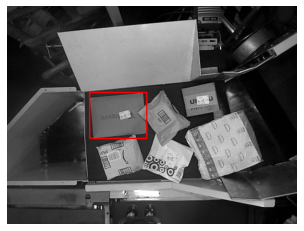

In [71]:
img=cv2.imread("/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112136093_1_targetRGBright_3c.jpg")
draw_rec(img,r,640,480)

In [76]:
cropped_img, my_x, my_y, my_w, my_h= get_cropped_image("/home/rndvision/Data/yolo_format_from_jsons_playment_2021-10-26/20210726112136093_1_targetRGBright_3c.jpg")

index:  2


In [83]:
r= (0, 0.6672345, 0.4298465, 0.13390700000000005, 0.16084499999999996)

In [84]:
r[0]

0

In [85]:


# Confirm
# X_crop= 255
# y_crop= 55
# w= 278
# h= 260

# Target
X_crop=179
y_crop= 158
w= 277
h= 230

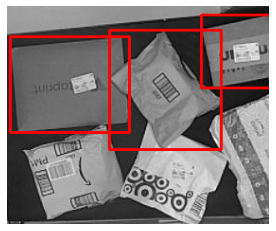

In [86]:
new_r=update_label_row(r,640,480,X_crop,y_crop,w,h)

if (new_r is not None):
    draw_rec(cropped_img,new_r,my_w, my_h)

In [78]:
new_r

array([0.        , 0.24028765, 0.36223165, 0.45584173, 0.44012661])

In [146]:
new_r= [1, ((640*r[1])-X_crop)/w, ((480*r[2])-y_crop)/h, ((r[3]*640)/w), ((r[4]*480)/h) ]

In [138]:
new_r

[1,
 1.1800583393501807,
 0.8360459130434781,
 0.34613371841155244,
 0.2956925217391304]

In [108]:
((640*r[1])-X_crop)/w

0.41395798561151087

In [109]:
((480*r[2])-y_crop)/h

0.3197181538461539

In [22]:
r= (40, 50, 25, 25)
Crop_pivr_tar  = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

cv2.imwrite("data/apbs_confirm_640x480_signature.jpg", Crop_pivr_tar)

Crop_pivr_tar.shape

plt.figure()
plt.imshow(Crop_pivr_tar)
plt.axis("off")
# show the images
plt.show()

In [27]:
# apbs_conf_orig=cv2.
# apbs_conf_orig.shape
apbs_tar_orig.shape

(30, 30, 3)

In [29]:
# imCrop == apbs_sig

b, g, r = cv2.split(cv2.subtract(imCrop, apbs_sig))

if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
    print("The images are completely Equal")

In [3]:
cv2.imshow("Image",img)
cv2.waitKey(0)


13

x,y,w,h

In [3]:
crop_img = img[100:100+180, 80:80+200]

In [ ]:
cv2.imshow("Image",crop_img)
cv2.waitKey(0)



In [28]:
1==1

True